###**Necessary Packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Q1

Data extraction

In [3]:
df = pd.read_excel('aggregateRockData.xlsx', engine='openpyxl', header=None)
labels = df.iloc[:480, 1].to_frame()
labels.rename(columns={1: 'label'}, inplace=True)
labels

label
0        1
1        1
2        1
3        1
4        1
..     ...
475      3
476      3
477      3
478      3
479      3

[480 rows x 1 columns]

In [4]:
rock_data = pd.read_csv('feature_presence540.txt', delim_whitespace=True, header=None)
groupings = rock_data.iloc[:480, 2].to_frame()
groupings.rename(columns={2: 'Grouping No.'}, inplace=True)
features = rock_data.iloc[:480, 3:14]
print(groupings)
print(groupings.dtypes)
print(set(groupings['Grouping No.'].apply(type)))
print(features)

    Grouping No.
0              1
1              2
2              3
3              4
4              5
..           ...
475           12
476           13
477           14
478           15
479           16

[480 rows x 1 columns]
Grouping No.    object
dtype: object
{<class 'str'>}
       3     4     5    6     7     8    9     10   11    12    13
0    0.20  0.15  0.00  0.0  0.00  0.05  0.0  0.30  0.0  0.00  0.10
1    0.65  0.15  0.00  0.0  0.05  0.00  0.0  0.10  0.0  0.05  0.05
2    0.60  0.00  0.00  0.0  0.05  0.00  0.0  0.35  0.0  0.00  0.05
3    0.10  0.85  0.00  0.0  0.05  0.00  0.0  0.10  0.0  0.00  0.10
4    0.35  0.80  0.00  0.0  0.00  0.00  0.0  0.10  0.0  0.00  0.05
..    ...   ...   ...  ...   ...   ...  ...   ...  ...   ...   ...
475  0.00  0.00  0.00  0.0  0.60  0.05  0.0  0.00  0.0  0.00  0.30
476  0.00  0.00  0.00  0.0  0.40  0.00  0.0  0.05  0.0  0.00  0.35
477  0.00  0.00  0.00  0.0  0.45  0.05  0.0  0.05  0.0  0.00  0.20
478  0.00  0.00  0.00  0.0  0.40  0.10  0.0  0.10

<ipython-input-4-ca15d1de8c06>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rock_data = pd.read_csv('feature_presence540.txt', delim_whitespace=True, header=None)


Feature description

In [5]:
print(features.dtypes)
features_des = features.describe(include='all')
print(features_des)

3      object
4      object
5      object
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
dtype: object
          3     4     5           6           7           8           9   \
count    480   480   480  480.000000  480.000000  480.000000  480.000000   
unique    21    20    21         NaN         NaN         NaN         NaN   
top     0.00  0.00  0.00         NaN         NaN         NaN         NaN   
freq     338   329   379         NaN         NaN         NaN         NaN   
mean     NaN   NaN   NaN    0.042292    0.165146    0.052396    0.144479   
std      NaN   NaN   NaN    0.160970    0.216635    0.102676    0.265689   
min      NaN   NaN   NaN    0.000000    0.000000    0.000000    0.000000   
25%      NaN   NaN   NaN    0.000000    0.000000    0.000000    0.000000   
50%      NaN   NaN   NaN    0.000000    0.100000    0.000000    0.000000   
75%      NaN   NaN   NaN    0.000000    0.212500    0.050000    0.100000

From all the statistical values, we can find that attributes 3-5 are discrete, while all the others are continuous, though all are float numbers. In order to train the data in a more convenient way, we need to transfer data of attributes 3-5 into continuous ones.

In [6]:
features[[3, 4, 5]] = features[[3, 4, 5]].astype('float64')
features_des = features.describe(include='all')
print(features_des)

               3           4           5           6           7           8   \
count  480.000000  480.000000  480.000000  480.000000  480.000000  480.000000   
mean     0.084479    0.080208    0.067729    0.042292    0.165146    0.052396   
std      0.193996    0.197648    0.194792    0.160970    0.216635    0.102676   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.100000    0.000000   
75%      0.050000    0.050000    0.000000    0.000000    0.212500    0.050000   
max      1.000000    1.000000    1.000000    1.000000    0.950000    0.900000   

               9           10          11          12          13  
count  480.000000  480.000000  480.000000  480.000000  480.000000  
mean     0.144479    0.141458    0.031667    0.025104    0.119854  
std      0.265689    0.168222    0.135647    0.112153    0.173149 

Histograms

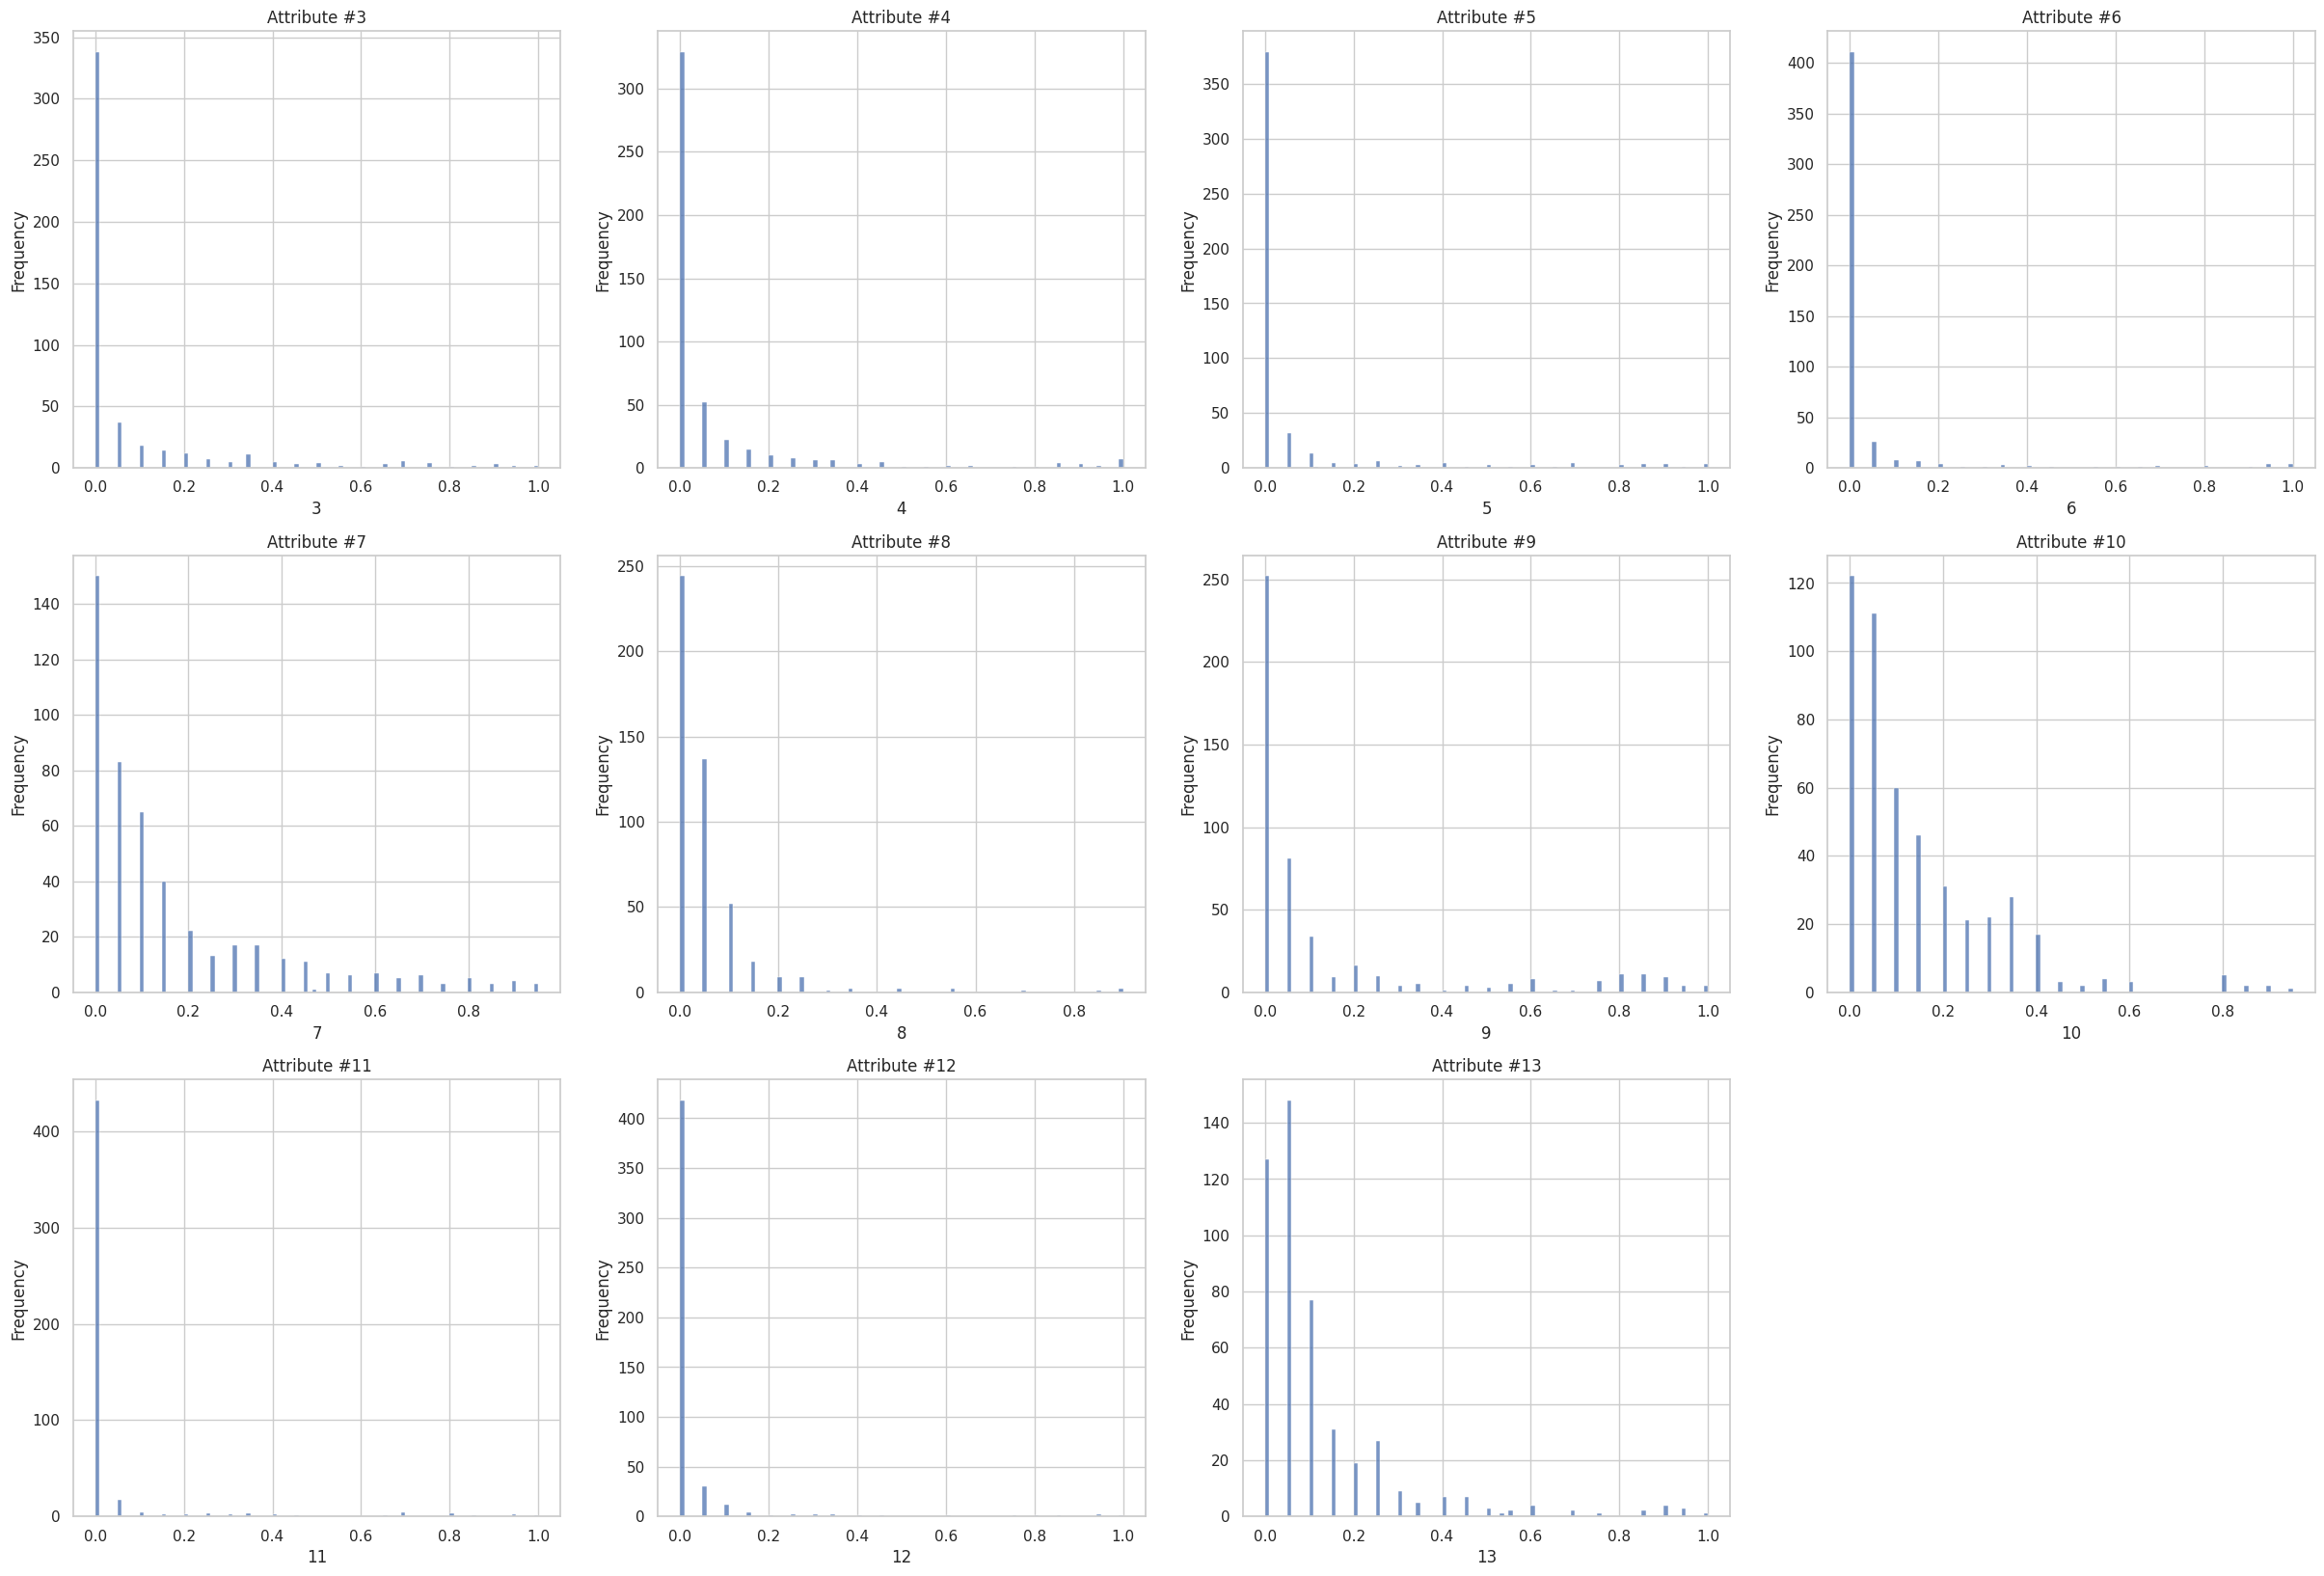

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [7]:
sns.set(style='whitegrid')
m, n = 3, 4

fig, axes = plt.subplots(m, n, figsize=(30, 20))

axes = axes.flatten()

for i, attribute in enumerate(features.columns):
  plt.figure()
  sns.histplot(features[attribute], kde=False, bins=100, ax=axes[i])
  axes[i].set_title(f'Attribute #{attribute}')
  axes[i].set_ylabel('Frequency')

for j in range(i+1, m*n):
  axes[j].axis('off')

plt.tight_layout()
plt.show()


Obviously, attributes #3, #4, #5, #6, #8, #9, #11, #12 has a very unbalanced distribution, as most of the values are zero; for others, the distribution is much more even, but it does not mean that #7 - #10 do not require standardization.

For #3 - #6, #8, #9, #11, #12, we use binary encoding, i.e. those whose values are not 0 will be transformed into 1, those whose values are zero will be kept.

For the rest, we will apply power transform in order to make their distributions similar to normal distribution.

###Standardization

In [8]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
for feature in [3,4,5,6,7,8,9,10,11,12,13]:
  if feature == 7 or feature == 8 or feature == 13:
    features[feature] = pt.fit_transform(features[[feature]])
  else:
    features[feature] = (features[feature] > 0).astype(int)

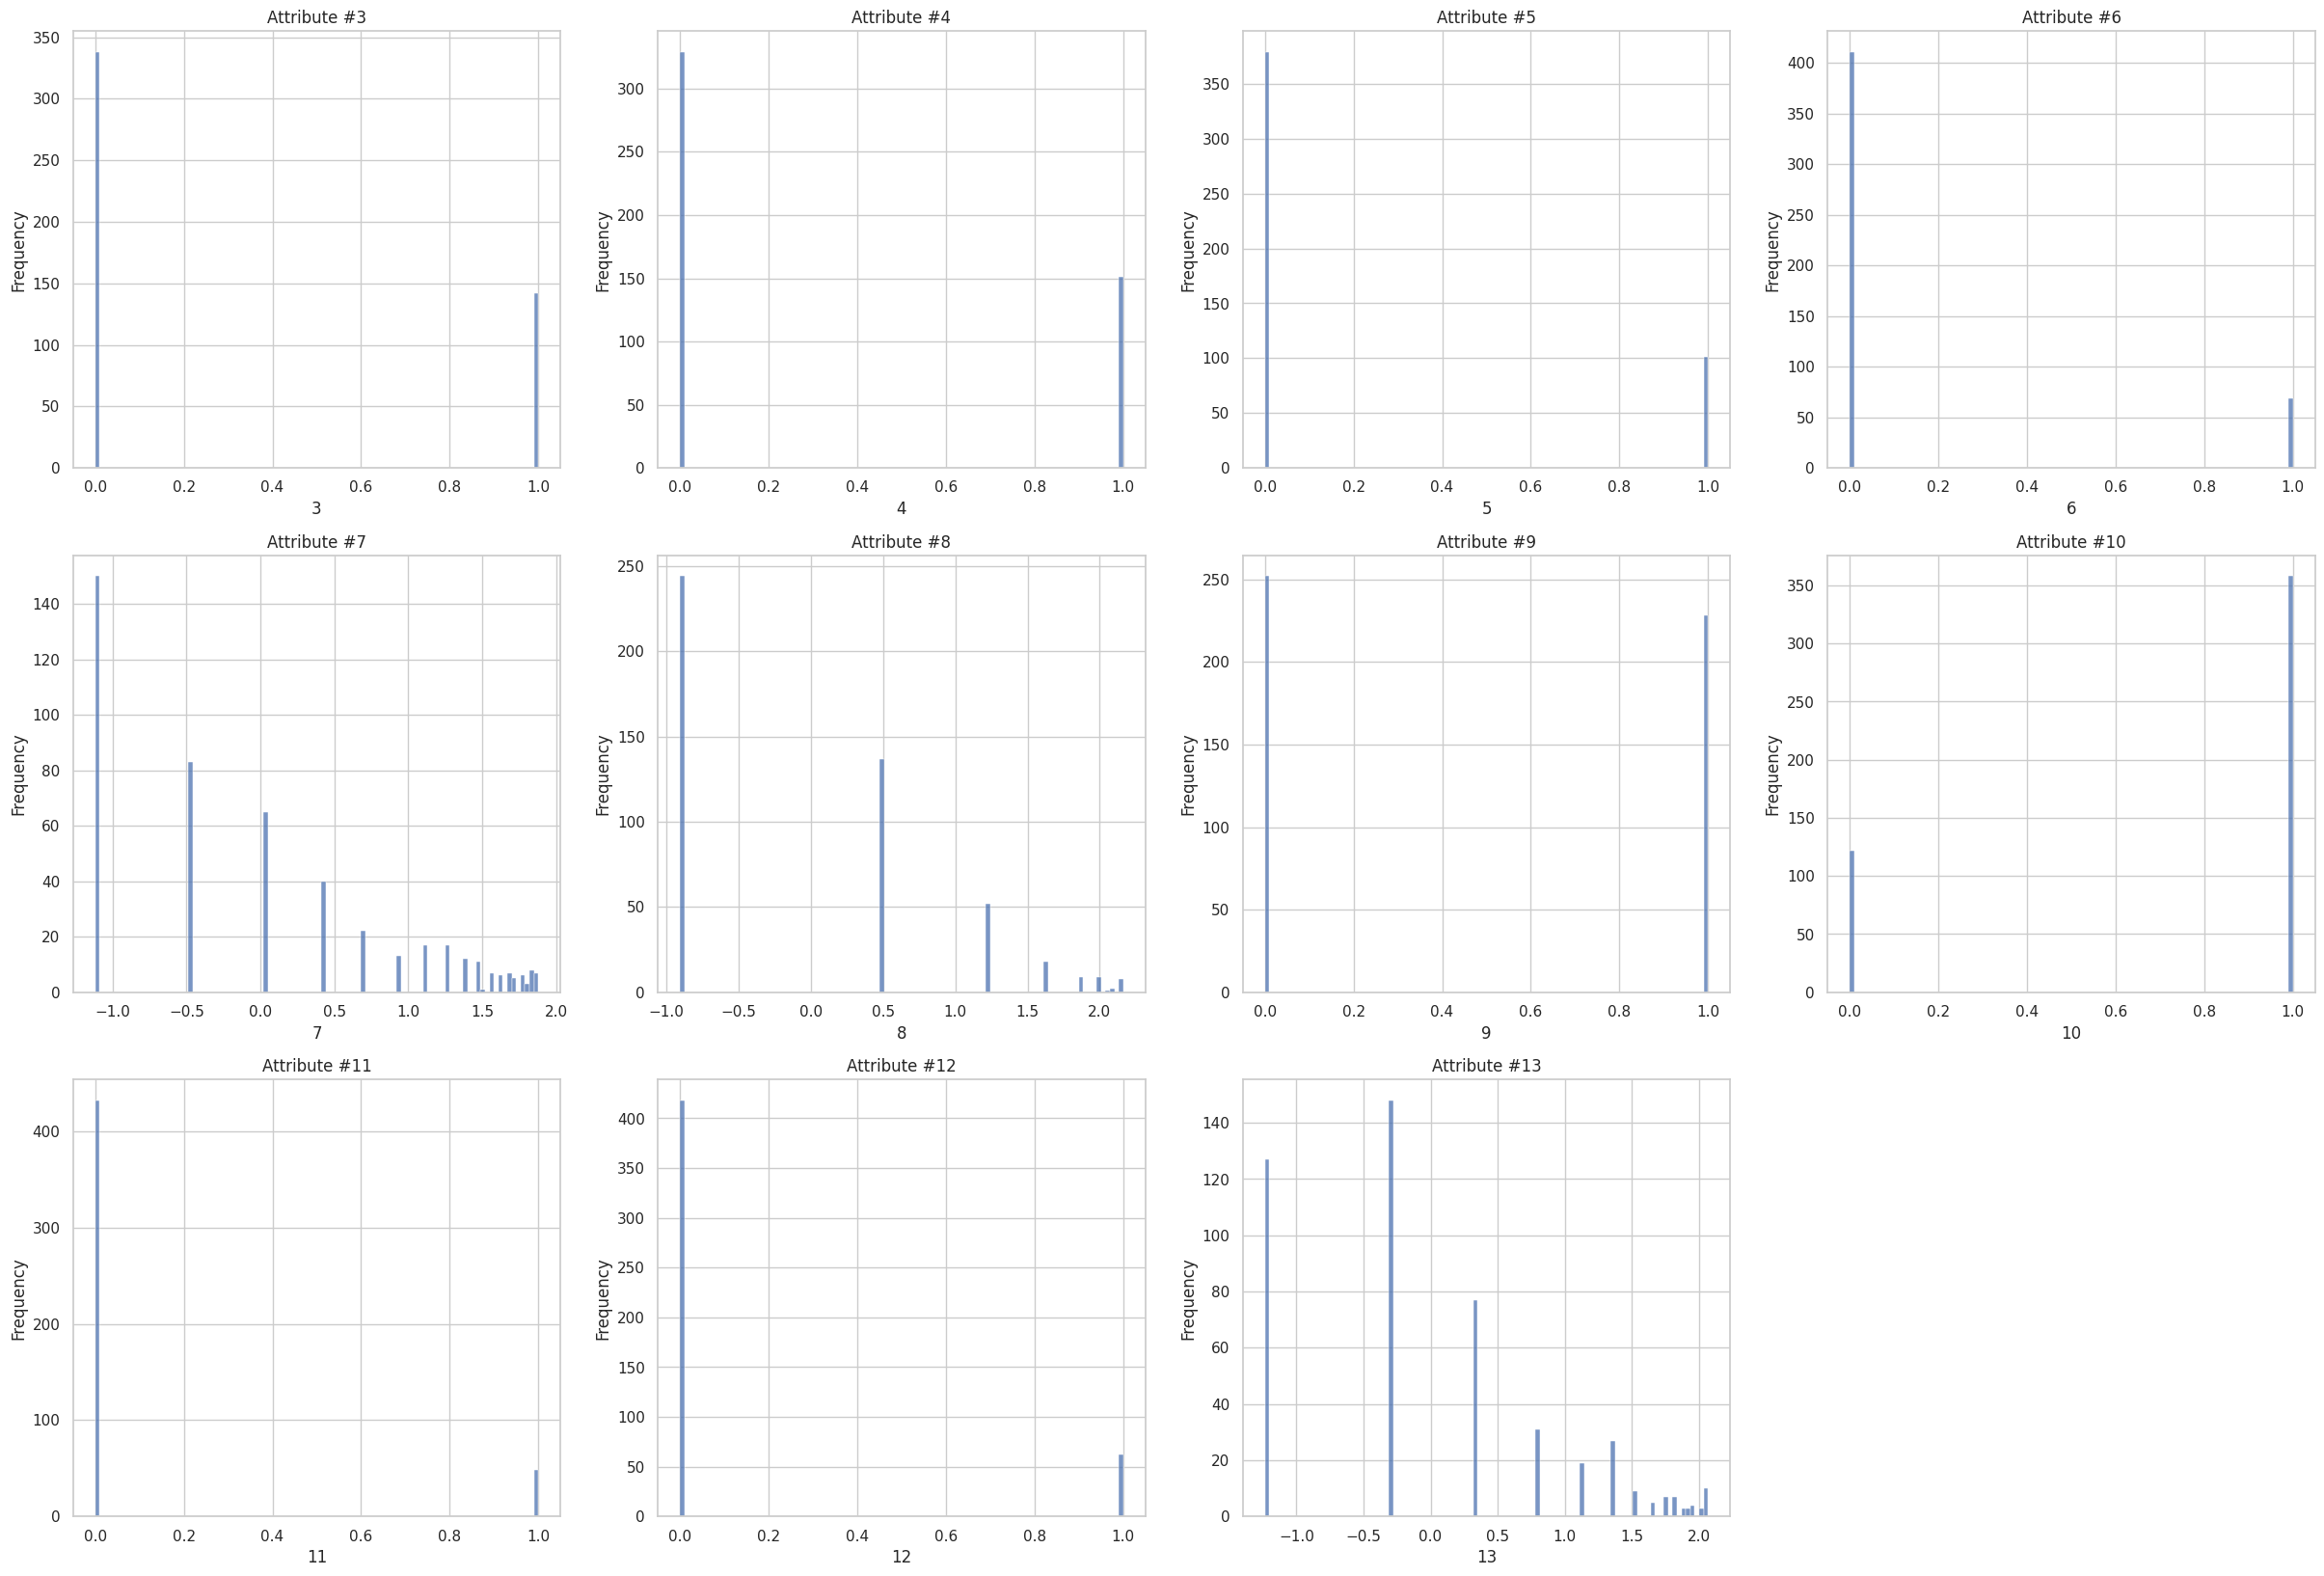

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
sns.set(style='whitegrid')
m, n = 3, 4

fig, axes = plt.subplots(m, n, figsize=(30, 20))

axes = axes.flatten()

for i, attribute in enumerate(features.columns):
  plt.figure()
  sns.histplot(features[attribute], kde=False, bins=100, ax=axes[i])
  axes[i].set_title(f'Attribute #{attribute}')
  axes[i].set_ylabel('Frequency')

for j in range(i+1, m*n):
  axes[j].axis('off')

plt.tight_layout()
plt.show()

###Q2

Pearson Correlation Coefficient matrix

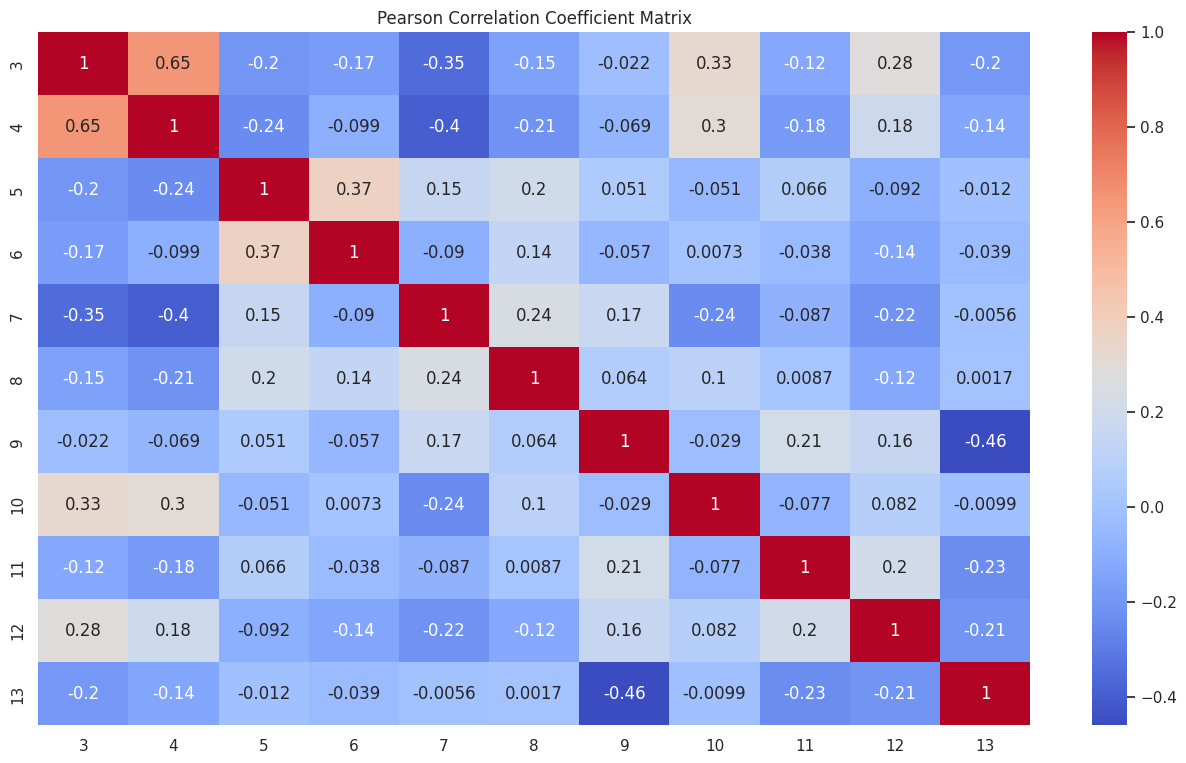

In [10]:
corr_mat = features.corr(method='pearson')

plt.figure(figsize=(16, 9))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Coefficient Matrix')
plt.show()

Highly related attributes:

Positive: 3 and 4, 5 and 6, 3 and 10

Negative: 9 and 13, 4 and 7, 3 and 7

Combination of features and labels for scattering

In [11]:
features_and_labels = pd.concat([features, labels], axis=1)
features_and_labels

3  4  5  6         7         8  9  10  11  12        13  label
0    1  1  0  0 -1.117813  0.504722  0   1   0   0  0.341500      1
1    1  1  0  0 -0.463783 -0.906308  0   1   0   1 -0.303165      1
2    1  0  0  0 -0.463783 -0.906308  0   1   0   0 -0.303165      1
3    1  1  0  0 -0.463783 -0.906308  0   1   0   0  0.341500      1
4    1  1  0  0 -1.117813 -0.906308  0   1   0   0 -0.303165      1
..  .. .. .. ..       ...       ... ..  ..  ..  ..       ...    ...
475  0  0  0  0  1.679781  0.504722  0   0   0   0  1.527033      3
476  0  0  0  0  1.387000 -0.906308  0   1   0   0  1.655232      3
477  0  0  0  0  1.482987  0.504722  0   1   0   0  1.119476      3
478  0  0  0  0  1.387000  1.241176  0   1   0   0  1.119476      3
479  0  0  0  0  1.626183 -0.906308  0   1   0   0  0.795217      3

[480 rows x 12 columns]

Pairwise scattering plots

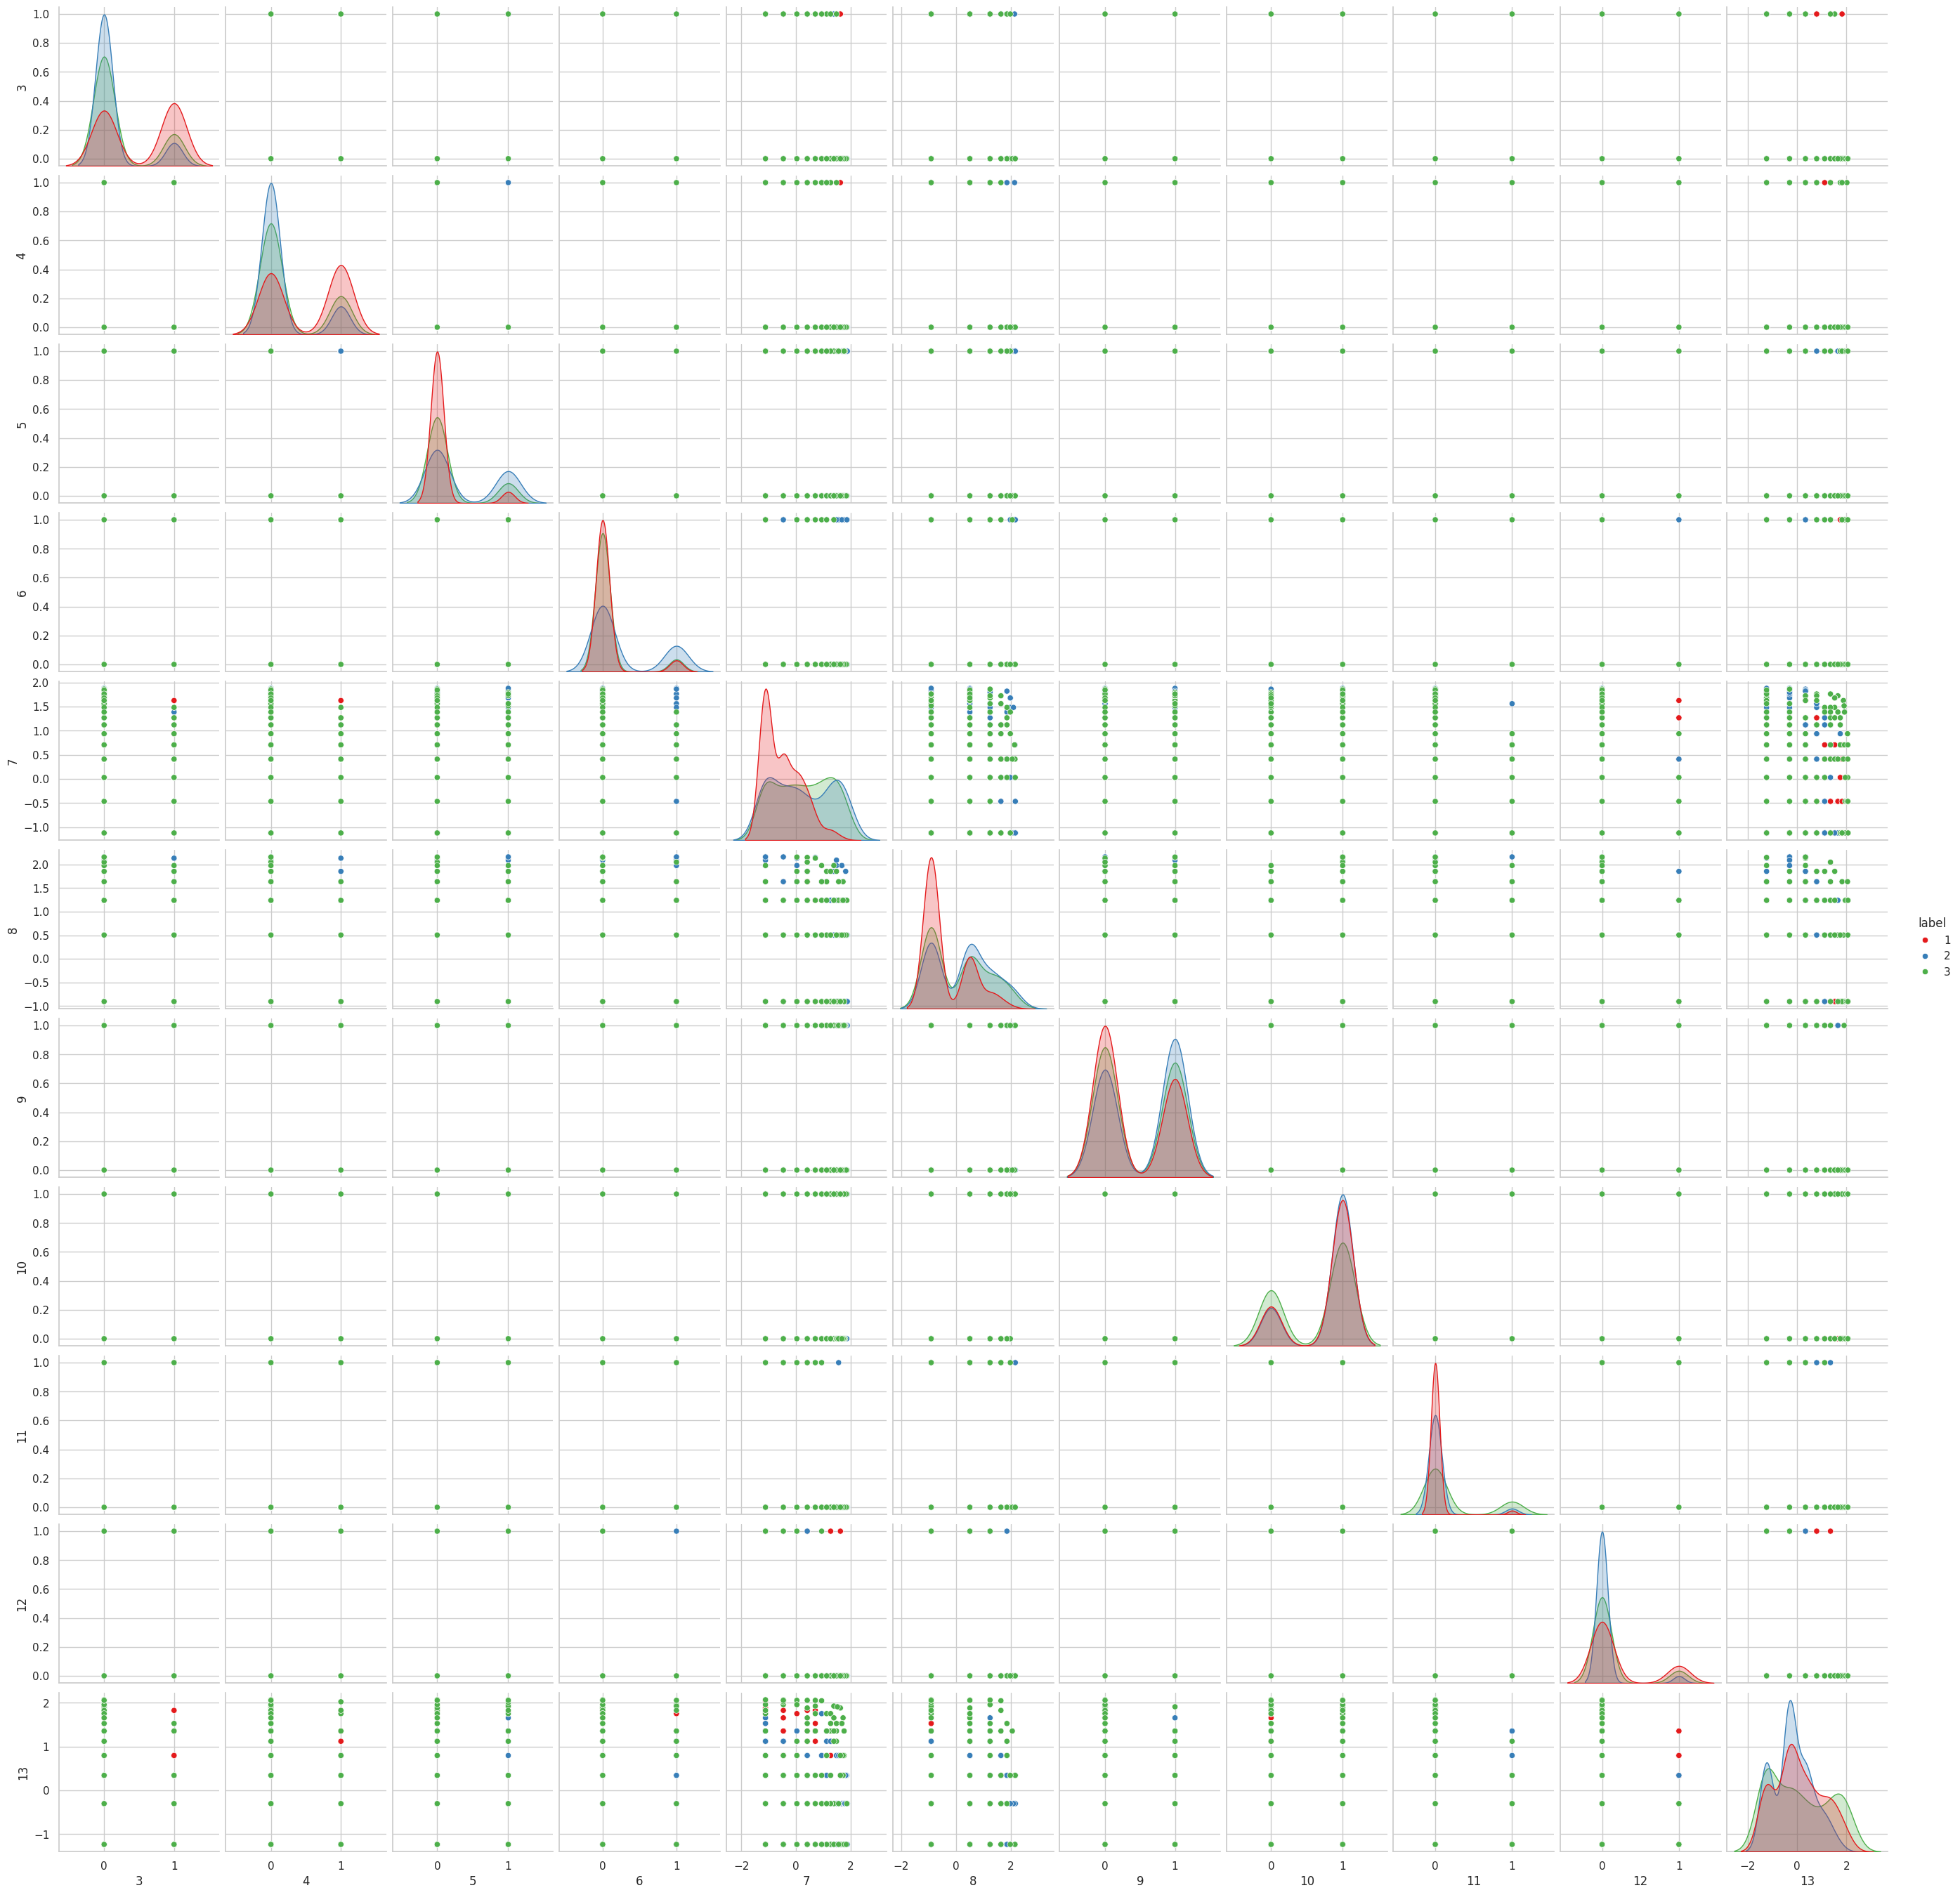

In [12]:
sns.pairplot(features_and_labels, hue='label', palette='Set1')

In the scatter plots, attributes #7 and #13 are highly related to different labels.

In [13]:
groupings_and_labels = pd.concat([labels, groupings], axis=1)
groupings_and_labels

label Grouping No.
0        1            1
1        1            2
2        1            3
3        1            4
4        1            5
..     ...          ...
475      3           12
476      3           13
477      3           14
478      3           15
479      3           16

[480 rows x 2 columns]

In [14]:
groupings_and_features = pd.concat([groupings, features], axis=1)
groupings_and_features

Grouping No.  3  4  5  6         7         8  9  10  11  12        13
0              1  1  1  0  0 -1.117813  0.504722  0   1   0   0  0.341500
1              2  1  1  0  0 -0.463783 -0.906308  0   1   0   1 -0.303165
2              3  1  0  0  0 -0.463783 -0.906308  0   1   0   0 -0.303165
3              4  1  1  0  0 -0.463783 -0.906308  0   1   0   0  0.341500
4              5  1  1  0  0 -1.117813 -0.906308  0   1   0   0 -0.303165
..           ... .. .. .. ..       ...       ... ..  ..  ..  ..       ...
475           12  0  0  0  0  1.679781  0.504722  0   0   0   0  1.527033
476           13  0  0  0  0  1.387000 -0.906308  0   1   0   0  1.655232
477           14  0  0  0  0  1.482987  0.504722  0   1   0   0  1.119476
478           15  0  0  0  0  1.387000  1.241176  0   1   0   0  1.119476
479           16  0  0  0  0  1.626183 -0.906308  0   1   0   0  0.795217

[480 rows x 12 columns]

###Q3

Getting training data, validation data and test data based on grouping number.

In [15]:
train_data = groupings_and_features[groupings_and_features['Grouping No.'].isin(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])].drop('Grouping No.', axis=1)
print(train_data)

val_data = groupings_and_features[groupings_and_features['Grouping No.'].isin(['11', '12', '13'])].drop('Grouping No.', axis=1)
print(val_data)

test_data = groupings_and_features[groupings_and_features['Grouping No.'].isin(['14', '15', '16'])].drop('Grouping No.', axis=1)
print(test_data)

     3  4  5  6         7         8  9  10  11  12        13
0    1  1  0  0 -1.117813  0.504722  0   1   0   0  0.341500
1    1  1  0  0 -0.463783 -0.906308  0   1   0   1 -0.303165
2    1  0  0  0 -0.463783 -0.906308  0   1   0   0 -0.303165
3    1  1  0  0 -0.463783 -0.906308  0   1   0   0  0.341500
4    1  1  0  0 -1.117813 -0.906308  0   1   0   0 -0.303165
..  .. .. .. ..       ...       ... ..  ..  ..  ..       ...
469  0  0  1  0  1.122200 -0.906308  0   1   0   0 -0.303165
470  0  0  1  0  1.561511  1.637145  1   0   0   0 -0.303165
471  0  0  0  0  1.724463  1.241176  1   1   0   0  0.795217
472  0  0  0  0  1.842939  0.504722  0   1   0   0 -1.234642
473  0  0  0  0  1.626183  0.504722  0   1   0   0  0.341500

[300 rows x 11 columns]
     3  4  5  6         7         8  9  10  11  12        13
10   1  1  0  0  0.031771 -0.906308  0   1   0   0  0.795217
11   1  1  0  0 -0.463783 -0.906308  0   1   0   0  1.354489
12   1  1  0  0 -1.117813  0.504722  0   1   0   0 -1.234642

Getting training label set, validation label set and test label set according to the grouping number.

In [16]:
train_label = groupings_and_labels[groupings_and_labels['Grouping No.'].isin(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])].drop('Grouping No.', axis=1)
print(train_label)
val_label = groupings_and_labels[groupings_and_labels['Grouping No.'].isin(['11', '12', '13'])].drop('Grouping No.', axis=1)
print(val_label)
test_label = groupings_and_labels[groupings_and_labels['Grouping No.'].isin(['14', '15', '16'])].drop('Grouping No.', axis=1)
print(test_label)

     label
0        1
1        1
2        1
3        1
4        1
..     ...
469      3
470      3
471      3
472      3
473      3

[300 rows x 1 columns]
     label
10       1
11       1
12       1
26       1
27       1
..     ...
459      3
460      3
474      3
475      3
476      3

[90 rows x 1 columns]
     label
13       1
14       1
15       1
29       1
30       1
..     ...
462      3
463      3
477      3
478      3
479      3

[90 rows x 1 columns]


###Q4

Finding the best model by hyperparameter combination

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation function
def evaluation(y_true, y_pred, dataset):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')

  print(f'{dataset} Evaluation: accuracy = {accuracy: .4f}; \nprecision = {precision: .4f}; \nrecall = {recall: .4f}; \nf1 = {f1: .4f}')

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'solver': ['newton-cg', 'sag', 'lbfgs'],
              'max_iter': [500, 1000, 2000]}
logi_reg = LogisticRegression(multi_class='multinomial')
grid = GridSearchCV(logi_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(train_data, train_label)

print(grid.best_params_)
best_model = grid.best_estimator_


train_preds = best_model.predict(train_data)
val_preds = best_model.predict(val_data)
test_preds = best_model.predict(test_data)

evaluation(train_label, train_preds, 'Training')
evaluation(val_label, val_preds, 'Validation')
evaluation(test_label, test_preds, 'Test')


{'C': 100, 'max_iter': 500, 'solver': 'newton-cg'}
Training Evaluation: accuracy =  0.6233; 
precision =  0.6223; 
recall =  0.6233; 
f1 =  0.6227
Validation Evaluation: accuracy =  0.6556; 
precision =  0.6629; 
recall =  0.6556; 
f1 =  0.6487
Test Evaluation: accuracy =  0.6111; 
precision =  0.6020; 
recall =  0.6111; 
f1 =  0.6033


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [18]:
from sklearn.svm import SVC


SVM = SVC()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [1,2,3,4,5], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(SVM, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(train_data, train_label)

print(grid.best_params_)
best_model = grid.best_estimator_

train_preds = best_model.predict(train_data)
val_preds = best_model.predict(val_data)
test_preds = best_model.predict(test_data)

evaluation(train_label, train_preds, 'Training')
evaluation(val_label, val_preds, 'Validation')
evaluation(test_label, test_preds, 'Test')

{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Training Evaluation: accuracy =  0.6067; 
precision =  0.6050; 
recall =  0.6067; 
f1 =  0.5961
Validation Evaluation: accuracy =  0.6556; 
precision =  0.6524; 
recall =  0.6556; 
f1 =  0.6482
Test Evaluation: accuracy =  0.6333; 
precision =  0.6393; 
recall =  0.6333; 
f1 =  0.6206


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

param_grid = {'max_depth': [3, 4, 5, 6, 7],
              'n_estimators': [50, 100, 200],
              'min_samples_split': [2, 4, 8, 16, 32],
              'min_samples_leaf': [1, 5, 10, 20]}

grid = GridSearchCV(RFC, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(train_data, train_label)

print(grid.best_params_)
best_model = grid.best_estimator_

train_preds = best_model.predict(train_data)
val_preds = best_model.predict(val_data)
test_preds = best_model.predict(test_data)

evaluation(train_label, train_preds, 'Training')
evaluation(val_label, val_preds, 'Validation')
evaluation(test_label, test_preds, 'Test')

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 50}
Training Evaluation: accuracy =  0.7667; 
precision =  0.7724; 
recall =  0.7667; 
f1 =  0.7654
Validation Evaluation: accuracy =  0.7000; 
precision =  0.7078; 
recall =  0.7000; 
f1 =  0.6905
Test Evaluation: accuracy =  0.6556; 
precision =  0.6583; 
recall =  0.6556; 
f1 =  0.6555


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Exploration on relationships between scores and single hyperparameters.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

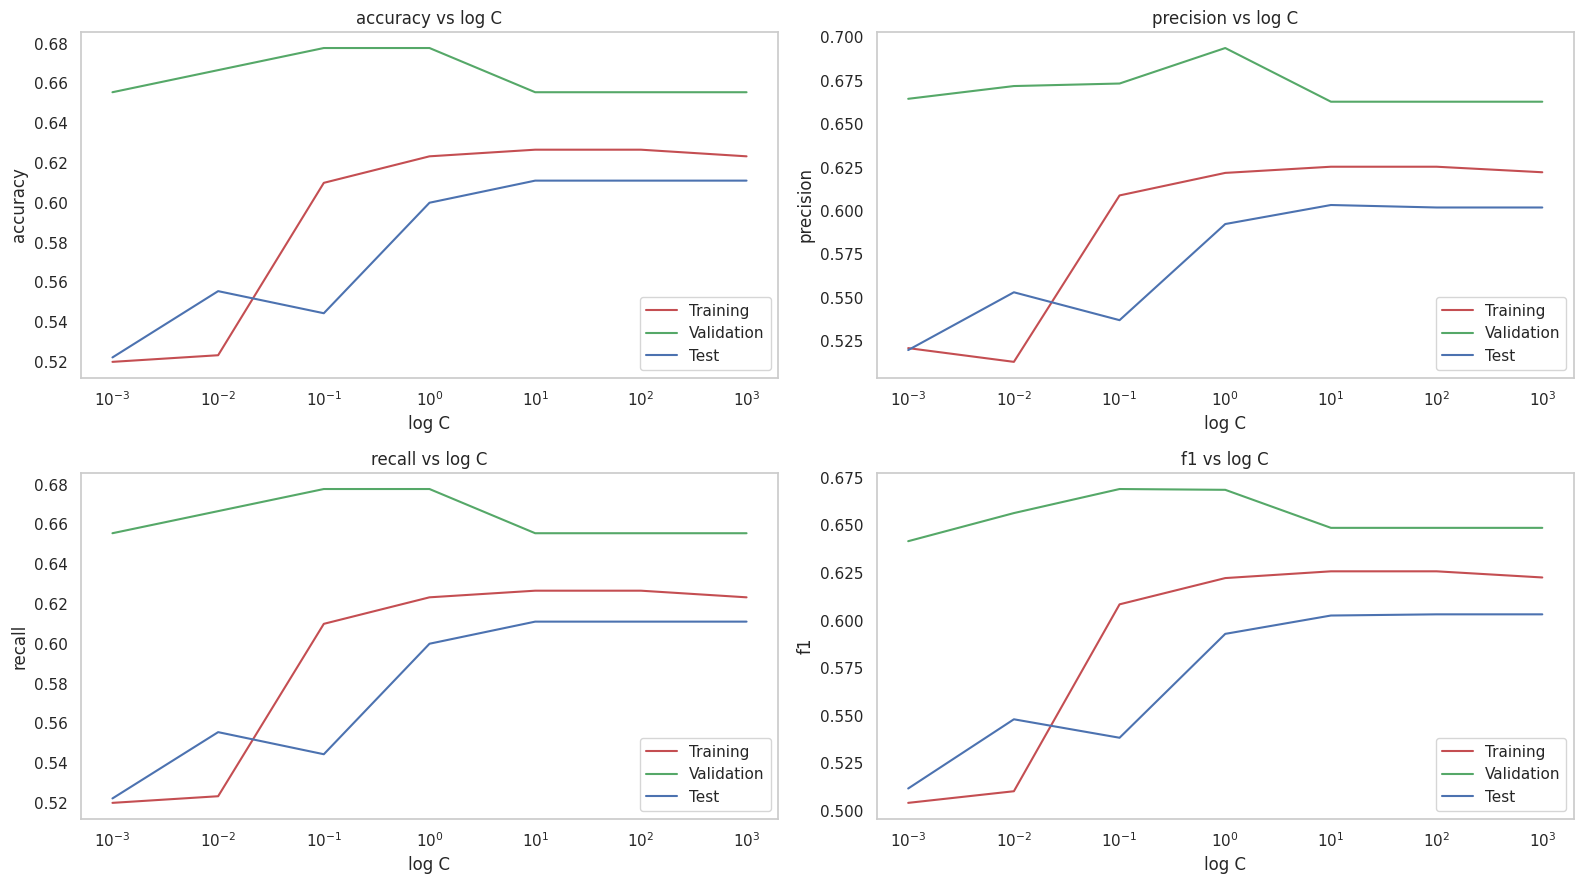

In [20]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
Solver = ['newton-cg', 'sag', 'lbfgs']
Max_iter = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

results_C = {'C': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for c in C:
  model = LogisticRegression(multi_class='multinomial', C=c)
  model.fit(train_data, train_label)
  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_C['C'].append(c)
  results_C['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_C['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_C['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_C['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_C['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_C['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_C['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_C['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_C['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_C['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_C['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_C['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_C['C'], results_C[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_C['C'], results_C[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_C['C'], results_C[f'test_{metric}'], label='Test', color='b')

  plt.xscale('log')
  plt.xlabel('log C')
  plt.ylabel(metric)
  plt.title(f'{metric} vs log C')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

Logistic regression: C influences the scores significantly. However, when C is too large, there will be risk of overfitting.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

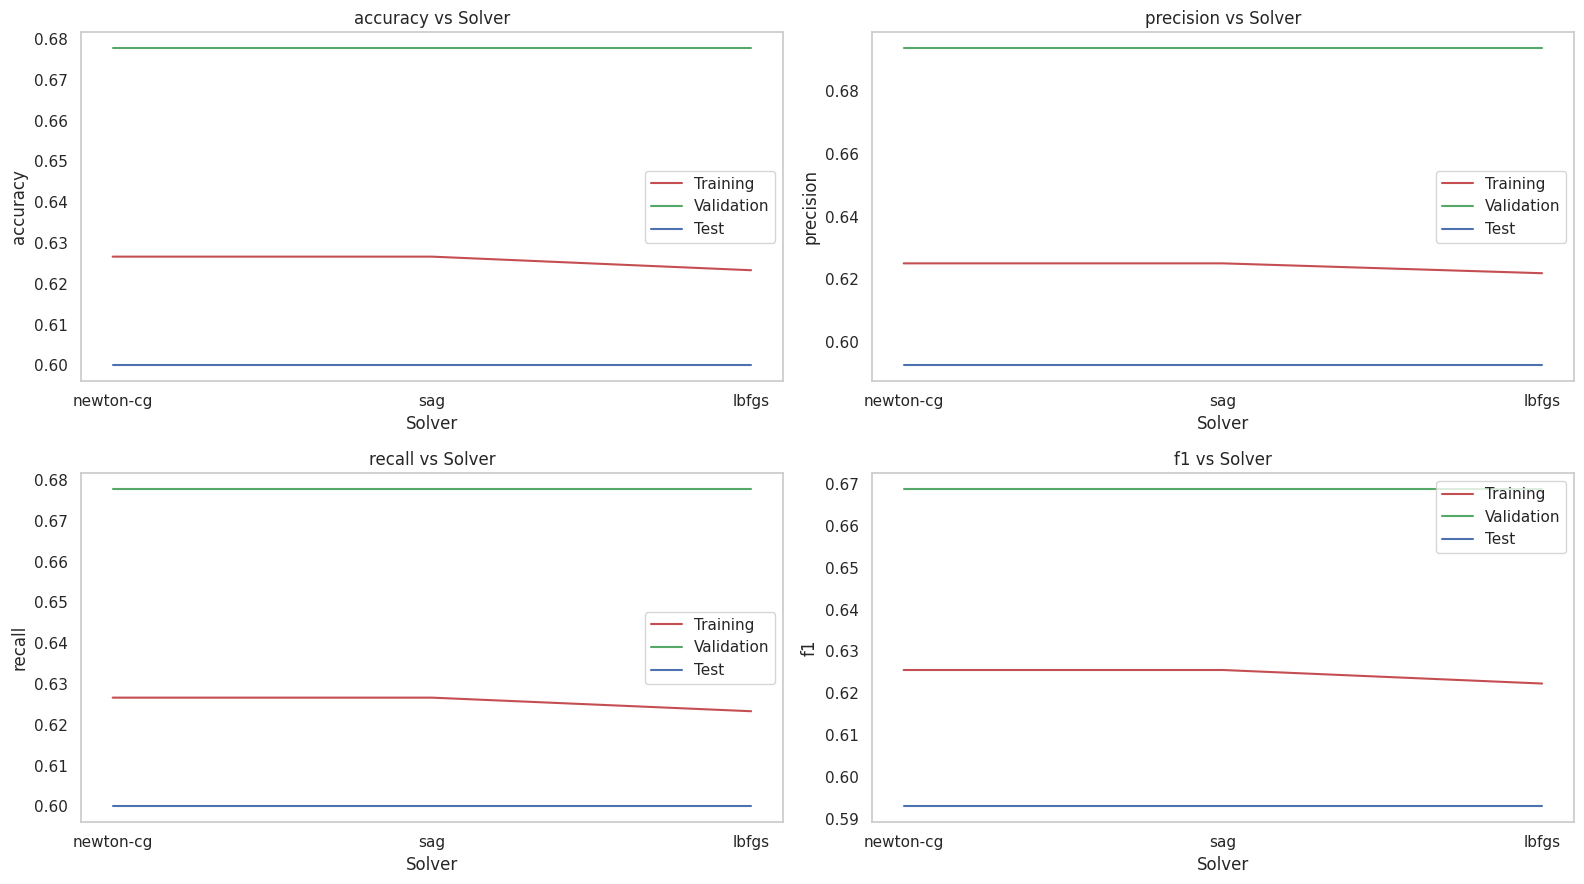

In [21]:
results_Solver = {'Solver': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for solver in Solver:
  model = LogisticRegression(multi_class='multinomial', solver=solver)
  model.fit(train_data, train_label)
  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_Solver['Solver'].append(solver)
  results_Solver['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_Solver['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_Solver['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_Solver['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_Solver['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_Solver['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_Solver['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_Solver['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_Solver['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_Solver['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_Solver['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_Solver['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_Solver['Solver'], results_Solver[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_Solver['Solver'], results_Solver[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_Solver['Solver'], results_Solver[f'test_{metric}'], label='Test', color='b')

  plt.xlabel('Solver')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Solver')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

Logistic regression: Solver type does not influence the scores.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

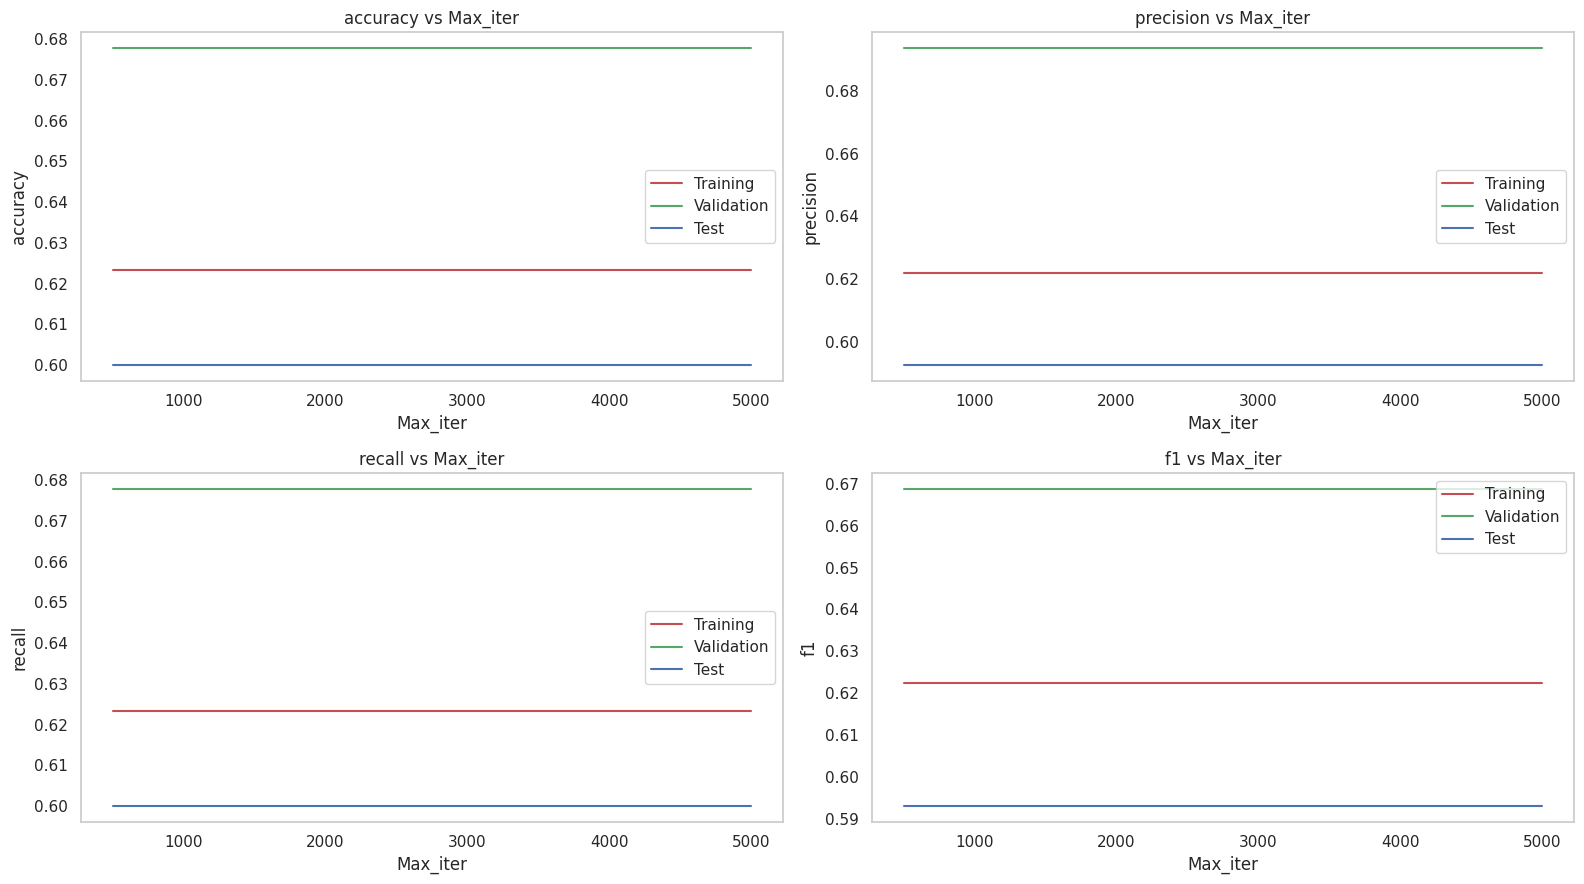

In [22]:
results_Max_iter = {'Max_iter': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for max_iter in Max_iter:
  model = LogisticRegression(multi_class='multinomial', max_iter=max_iter)
  model.fit(train_data, train_label)
  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_Max_iter['Max_iter'].append(max_iter)
  results_Max_iter['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_Max_iter['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_Max_iter['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_Max_iter['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_Max_iter['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_Max_iter['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_Max_iter['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_Max_iter['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_Max_iter['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_Max_iter['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_Max_iter['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_Max_iter['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_Max_iter['Max_iter'], results_Max_iter[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_Max_iter['Max_iter'], results_Max_iter[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_Max_iter['Max_iter'], results_Max_iter[f'test_{metric}'], label='Test', color='b')

  plt.xlabel('Max_iter')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Max_iter')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

Linear regression: maximum number of iterations does not influence the scores.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

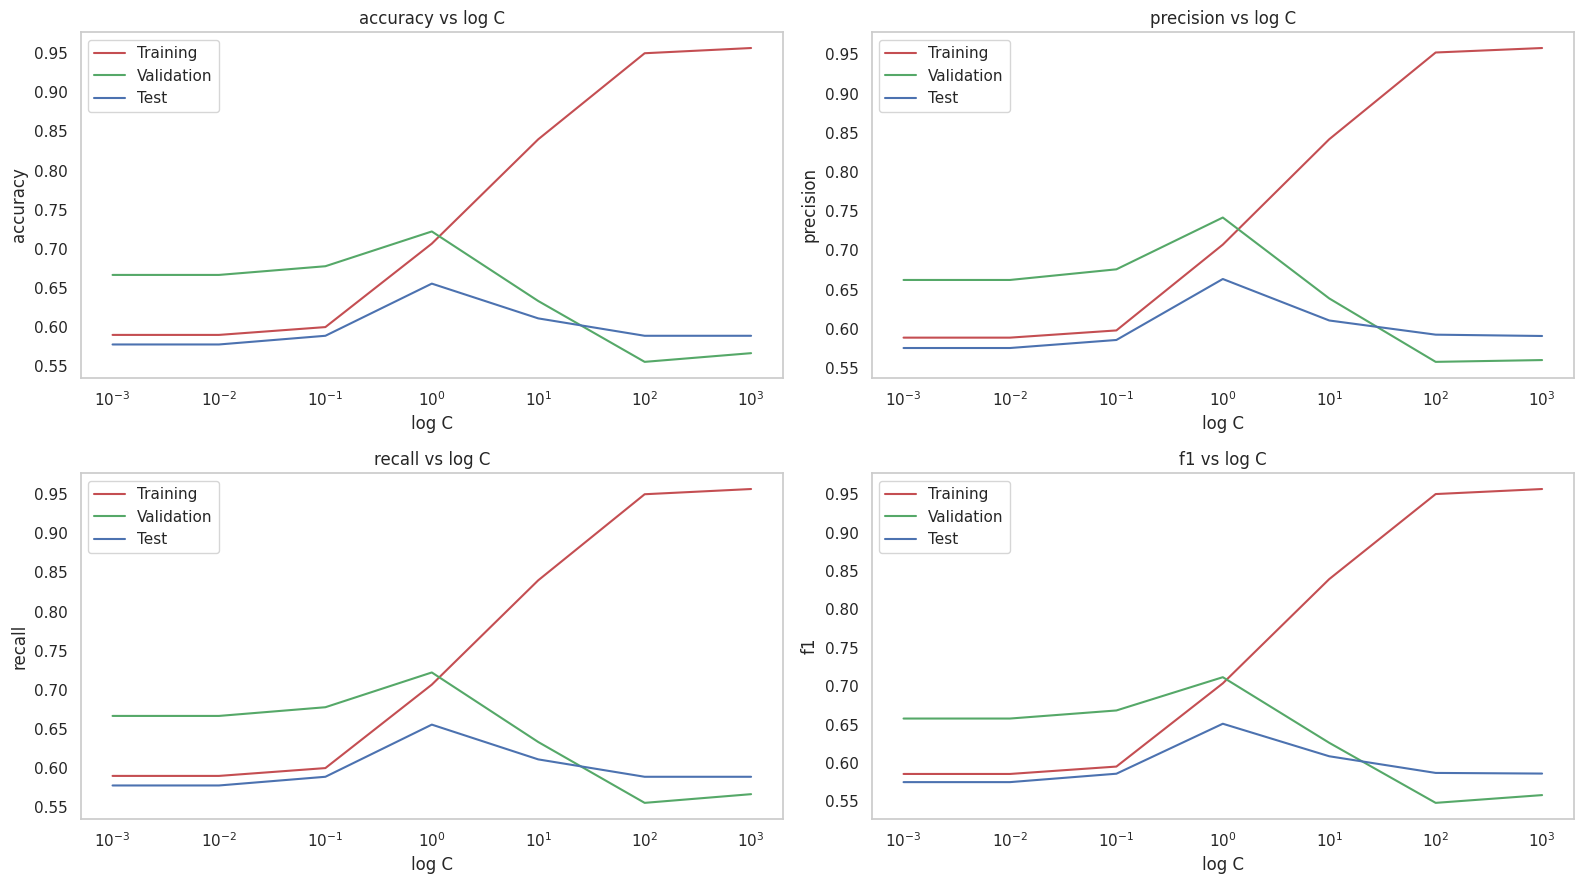

In [23]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
Kernel = ['linear', 'poly', 'rbf', 'sigmoid']
Degree = [1,2,3,4,5]
Gamma = ['scale', 'auto']

results_C = {'C': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for c in C:
  model = SVC(C=c)
  model.fit(train_data, train_label)
  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_C['C'].append(c)
  results_C['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_C['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_C['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_C['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_C['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_C['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_C['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_C['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_C['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_C['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_C['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_C['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_C['C'], results_C[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_C['C'], results_C[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_C['C'], results_C[f'test_{metric}'], label='Test', color='b')

  plt.xscale('log')
  plt.xlabel('log C')
  plt.ylabel(metric)
  plt.title(f'{metric} vs log C')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

SVM: As C increases, the performance gets better before a particular threshold, which requires further exploration. When C is greater than the threshold, risk of overfitting will increase.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

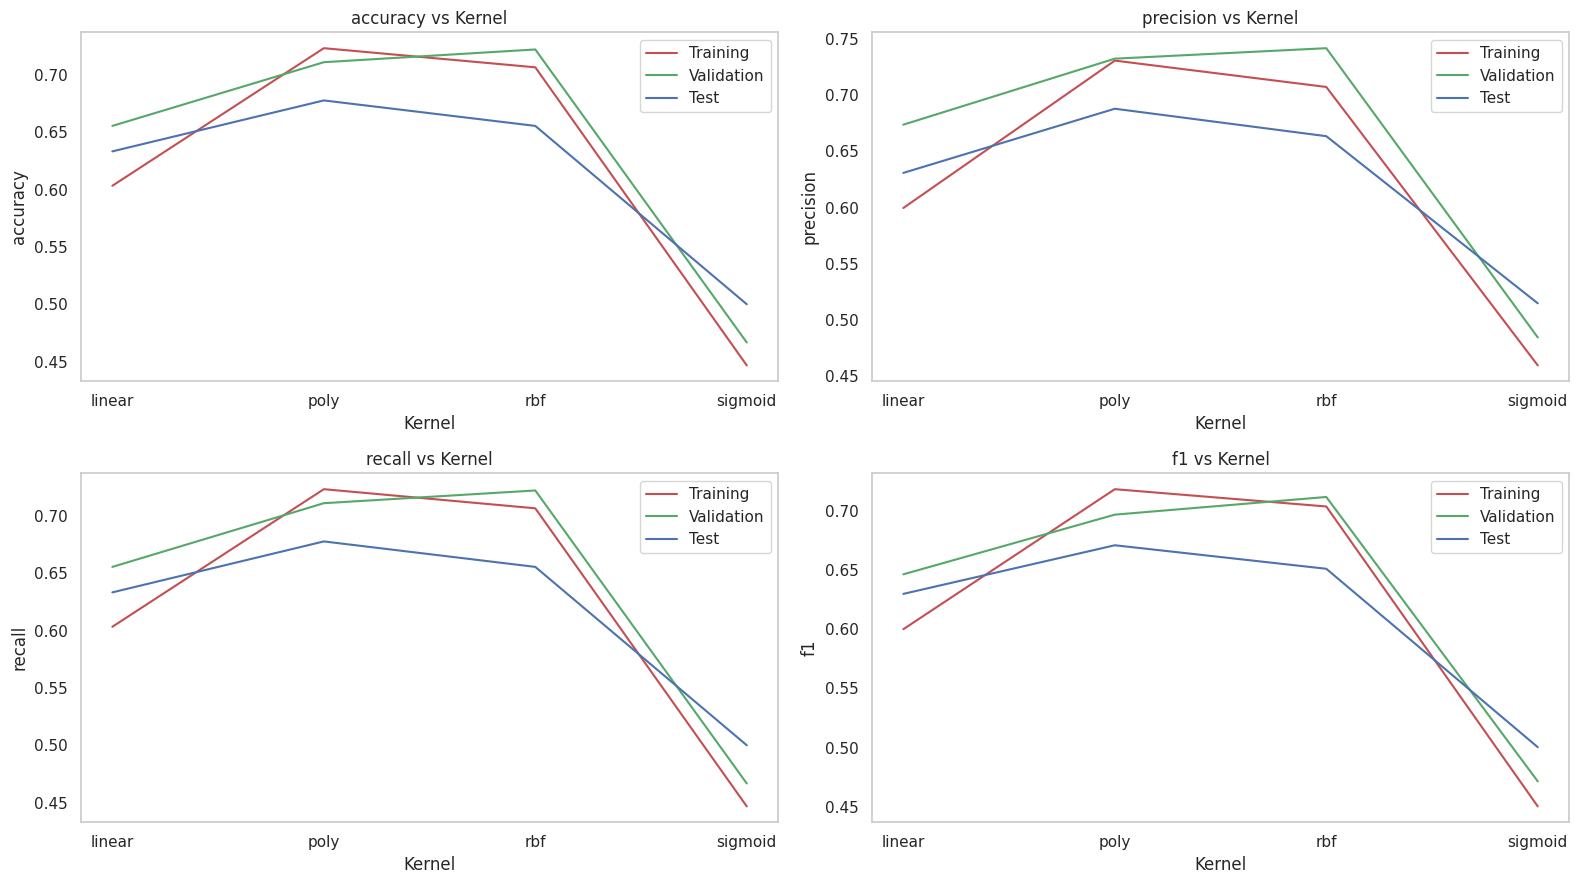

In [24]:
results_Kernel = {'Kernel': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for kernel in Kernel:
  model = SVC(kernel=kernel)
  model.fit(train_data, train_label)
  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_Kernel['Kernel'].append(kernel)
  results_Kernel['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_Kernel['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_Kernel['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_Kernel['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_Kernel['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_Kernel['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_Kernel['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_Kernel['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_Kernel['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_Kernel['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_Kernel['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_Kernel['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_Kernel['Kernel'], results_Kernel[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_Kernel['Kernel'], results_Kernel[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_Kernel['Kernel'], results_Kernel[f'test_{metric}'], label='Test', color='b')

  plt.xlabel('Kernel')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Kernel')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

SVM: both poly and rbf kernels perform best, then linear kernel. Sigmoid kernel leads to severe underfitting.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

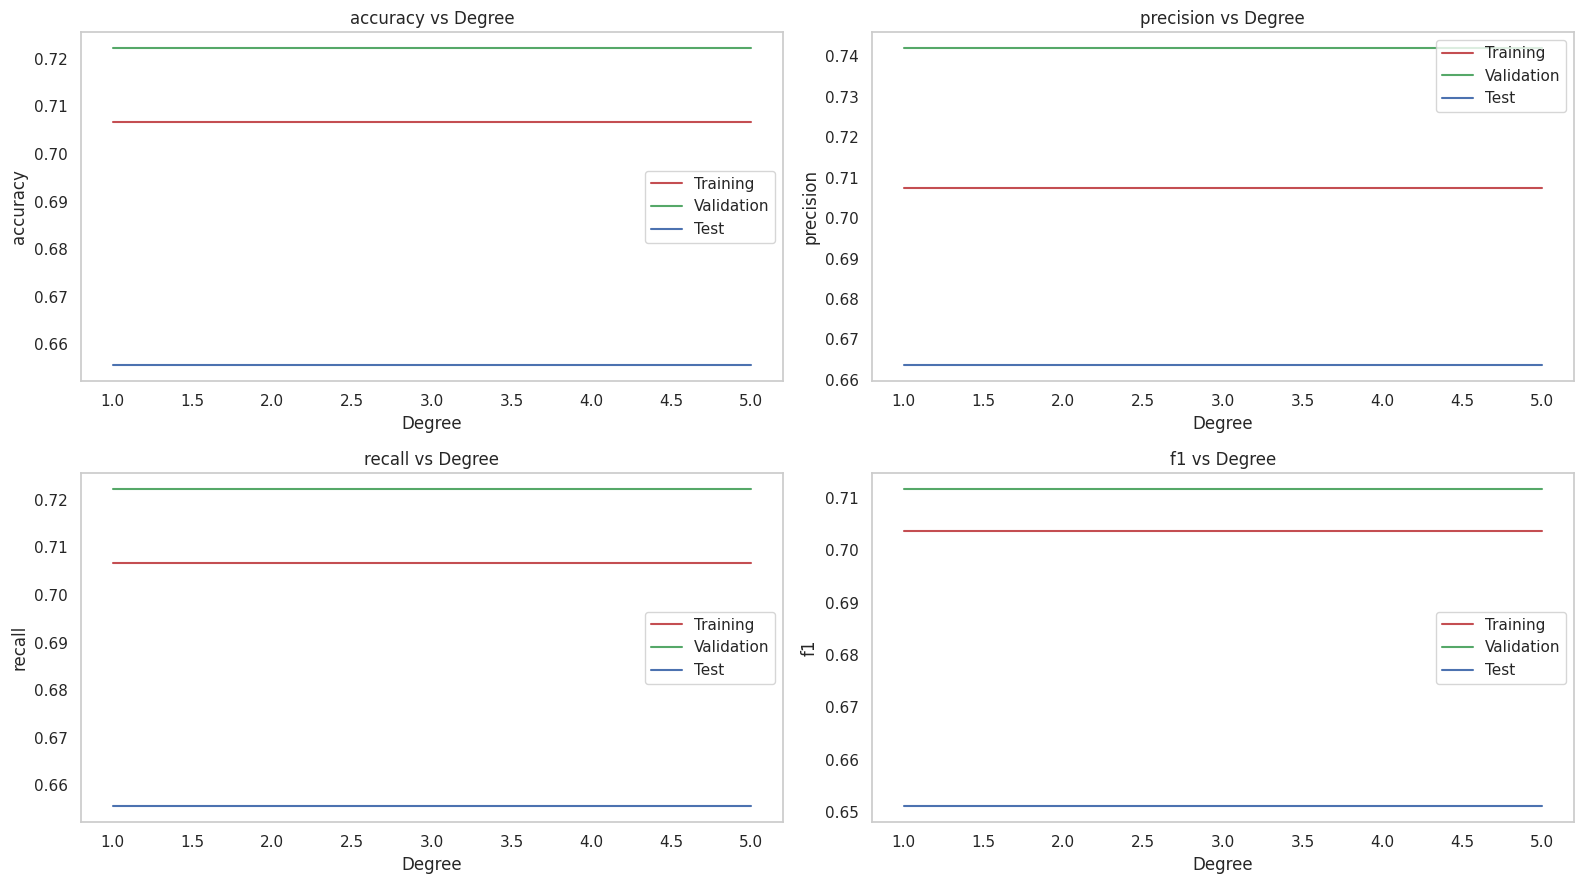

In [25]:
results_Degree = {'Degree': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for degree in Degree:
  model = SVC(degree=degree)
  model.fit(train_data, train_label)
  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_Degree['Degree'].append(degree)
  results_Degree['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_Degree['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_Degree['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_Degree['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_Degree['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_Degree['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_Degree['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_Degree['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_Degree['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_Degree['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_Degree['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_Degree['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_Degree['Degree'], results_Degree[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_Degree['Degree'], results_Degree[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_Degree['Degree'], results_Degree[f'test_{metric}'], label='Test', color='b')

  plt.xlabel('Degree')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Degree')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

SVM: degree does not influence the performance.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


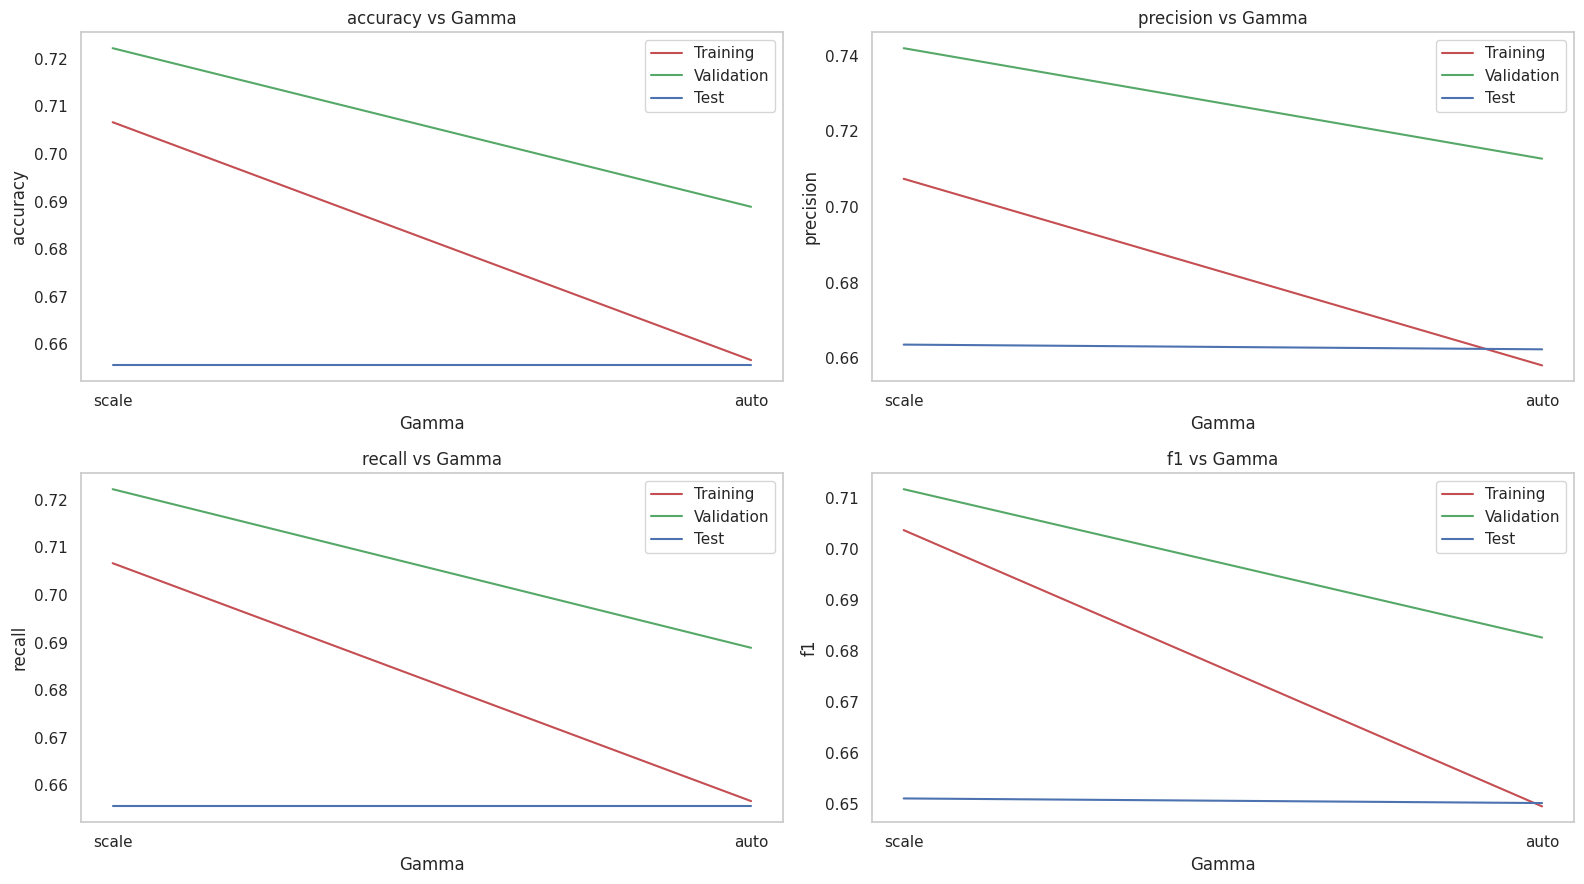

In [26]:
results_Gamma = {'Gamma': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for gamma in Gamma:
  model = SVC(gamma=gamma)
  model.fit(train_data, train_label)
  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_Gamma['Gamma'].append(gamma)
  results_Gamma['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_Gamma['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_Gamma['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_Gamma['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_Gamma['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_Gamma['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_Gamma['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_Gamma['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_Gamma['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_Gamma['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_Gamma['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_Gamma['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_Gamma['Gamma'], results_Gamma[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_Gamma['Gamma'], results_Gamma[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_Gamma['Gamma'], results_Gamma[f'test_{metric}'], label='Test', color='b')

  plt.xlabel('Gamma')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Gamma')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()



SVM: For Gamma, scale performs better than auto.

In [27]:
Max_depth = [3, 4, 5, 6, 7]
N_estimators = [50, 100, 150, 200]
Min_samples_split = list(range(2, 13, 1))
Min_samples_leaf = list(range(1, 11, 1))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

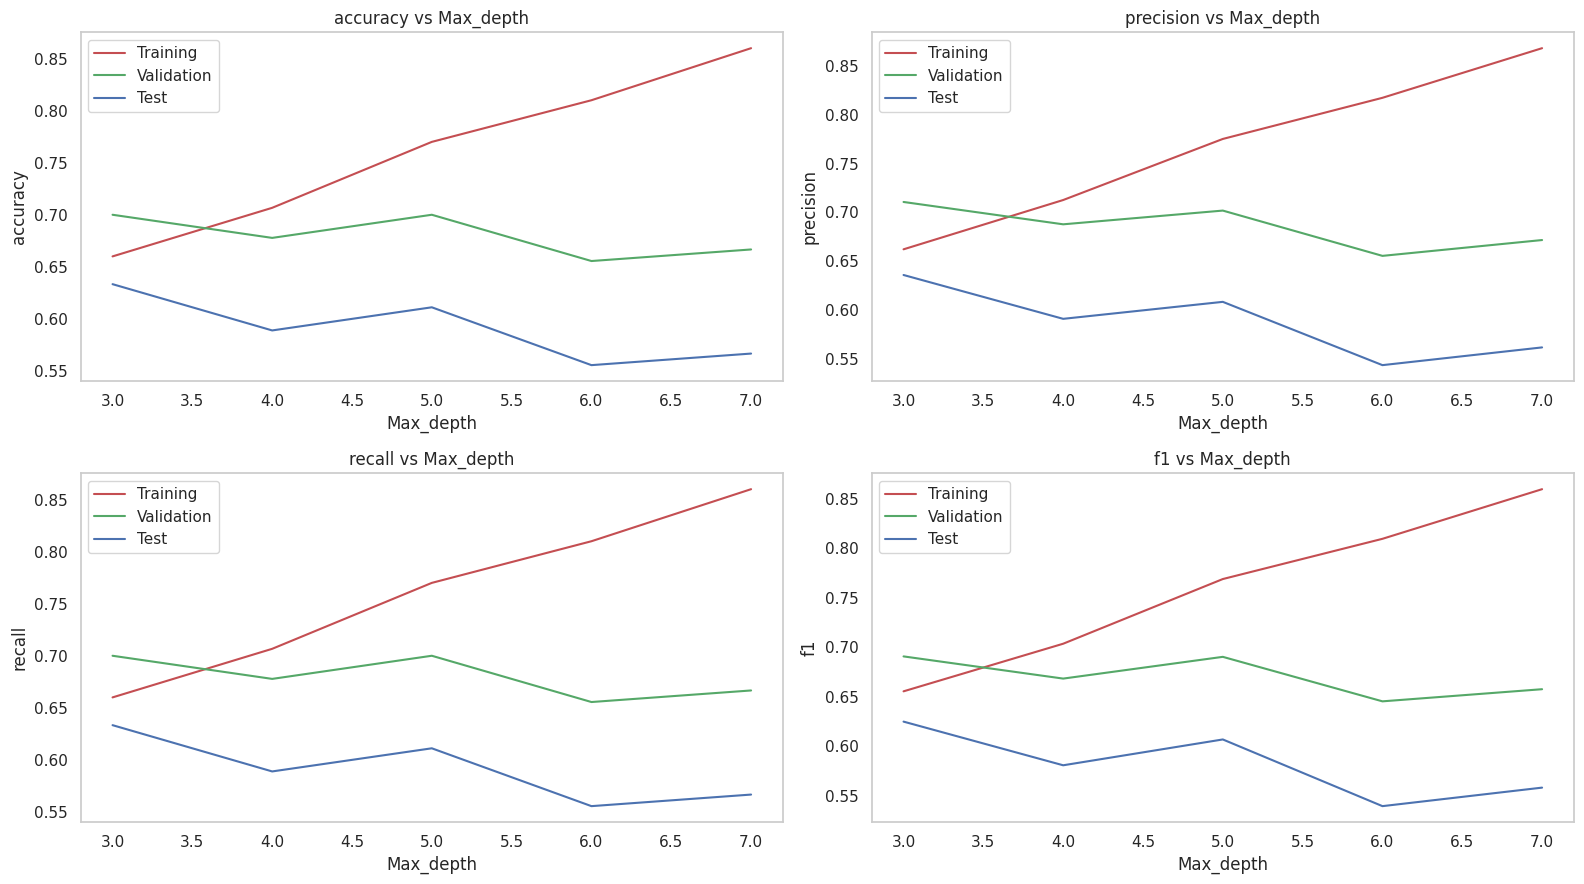

In [28]:
results_Max_depth = {'Max_depth': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for max_depth in Max_depth:
  model = RandomForestClassifier(max_depth=max_depth)
  model.fit(train_data, train_label)

  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_Max_depth['Max_depth'].append(max_depth)
  results_Max_depth['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_Max_depth['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_Max_depth['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_Max_depth['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_Max_depth['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_Max_depth['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_Max_depth['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_Max_depth['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_Max_depth['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_Max_depth['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_Max_depth['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_Max_depth['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_Max_depth['Max_depth'], results_Max_depth[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_Max_depth['Max_depth'], results_Max_depth[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_Max_depth['Max_depth'], results_Max_depth[f'test_{metric}'], label='Test', color='b')

  plt.xlabel('Max_depth')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Max_depth')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()


Random Forest: as maximum depth increases, the performance increases with a small risk of overfitting.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

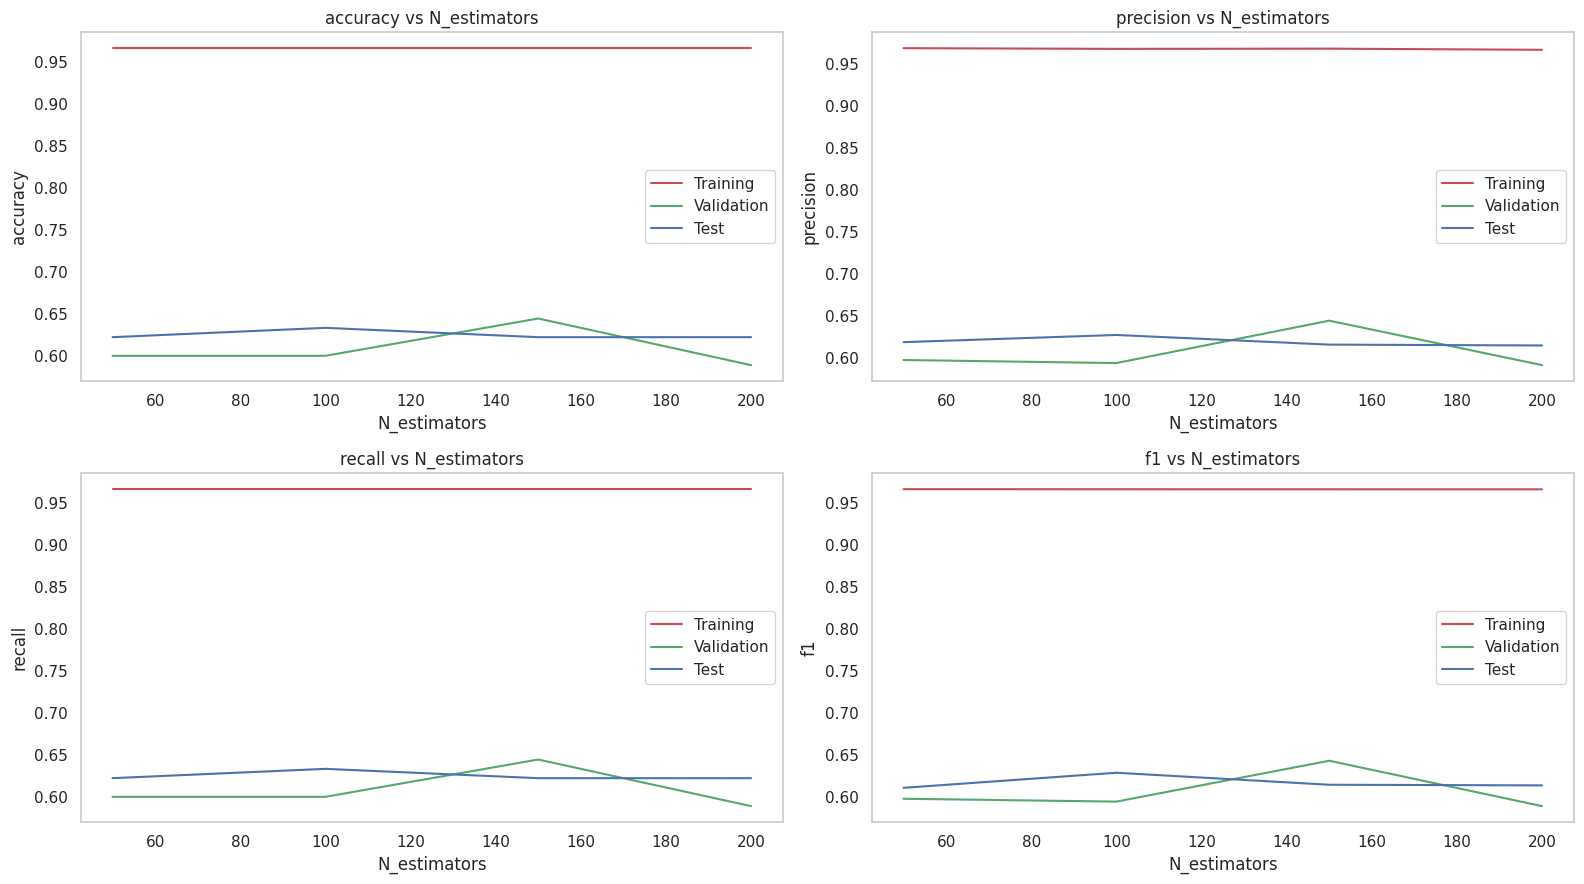

In [29]:
results_N_estimators = {'N_estimators': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for n_estimators in N_estimators:
  model = RandomForestClassifier(n_estimators=n_estimators)
  model.fit(train_data, train_label)

  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_N_estimators['N_estimators'].append(n_estimators)
  results_N_estimators['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_N_estimators['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_N_estimators['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_N_estimators['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_N_estimators['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_N_estimators['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_N_estimators['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_N_estimators['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_N_estimators['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_N_estimators['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_N_estimators['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_N_estimators['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))

metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_N_estimators['N_estimators'], results_N_estimators[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_N_estimators['N_estimators'], results_N_estimators[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_N_estimators['N_estimators'], results_N_estimators[f'test_{metric}'], label='Test', color='b')
  plt.xlabel('N_estimators')
  plt.ylabel(metric)
  plt.title(f'{metric} vs N_estimators')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

Random forest: When the number of estimators increases, only validation scores and test scores will be influenced. when the number of estimators is too high, there may be risk of overfitting, which requires further explorations.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

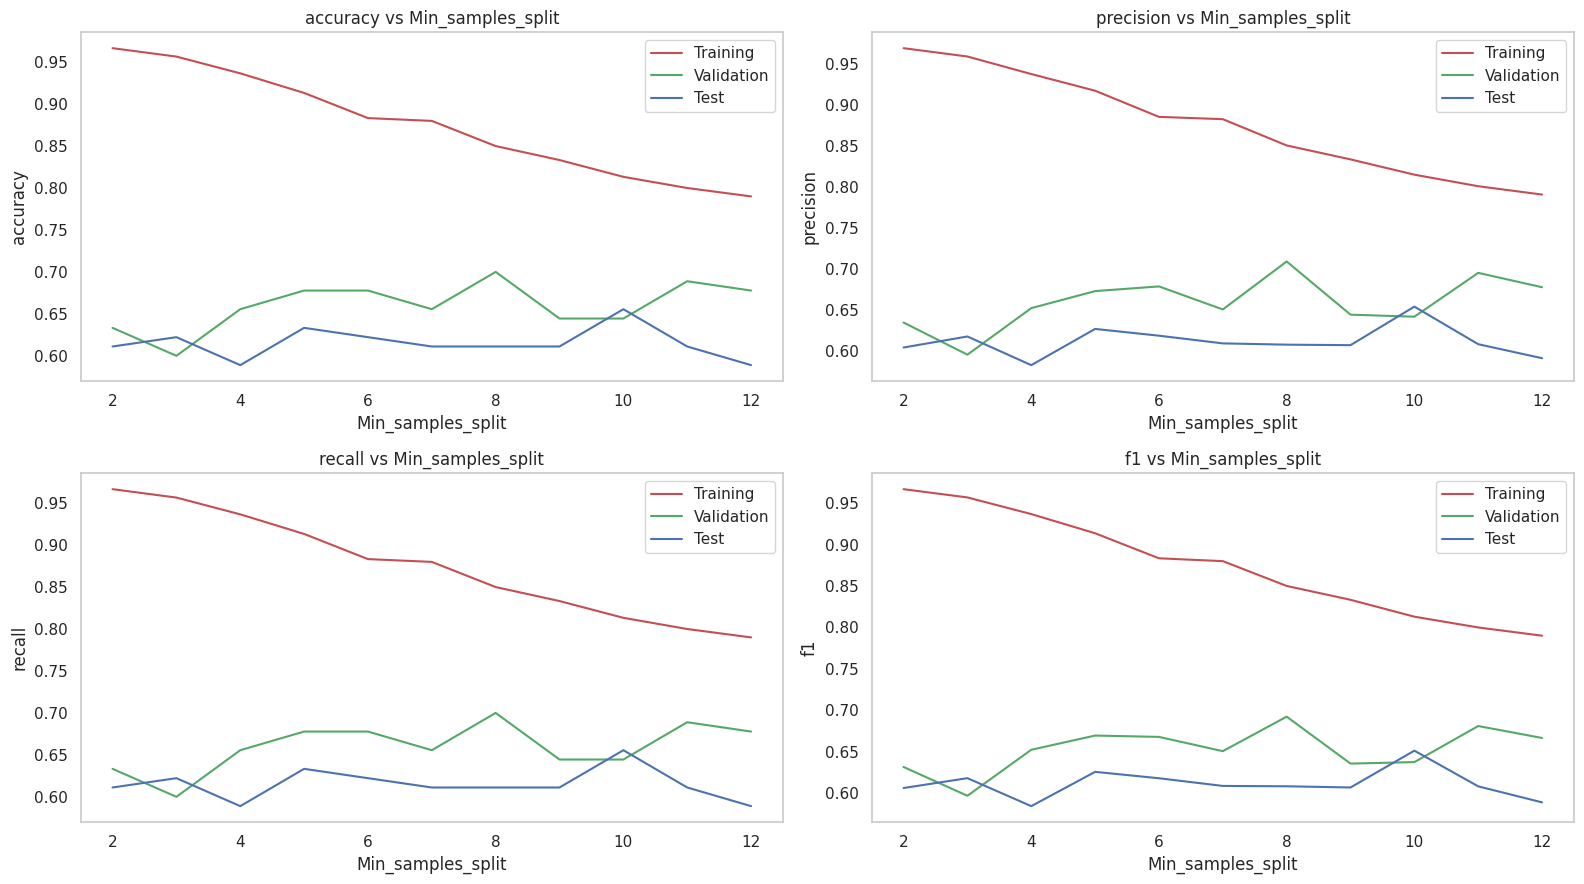

In [30]:
results_Min_samples_split = {'Min_samples_split': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for min_samples_split in Min_samples_split:
  model = RandomForestClassifier(min_samples_split=min_samples_split)
  model.fit(train_data, train_label)

  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_Min_samples_split['Min_samples_split'].append(min_samples_split)
  results_Min_samples_split['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_Min_samples_split['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_Min_samples_split['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_Min_samples_split['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_Min_samples_split['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_Min_samples_split['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_Min_samples_split['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_Min_samples_split['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_Min_samples_split['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_Min_samples_split['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_Min_samples_split['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_Min_samples_split['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))

metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_Min_samples_split['Min_samples_split'], results_Min_samples_split[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_Min_samples_split['Min_samples_split'], results_Min_samples_split[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_Min_samples_split['Min_samples_split'], results_Min_samples_split[f'test_{metric}'], label='Test', color='b')
  plt.xlabel('Min_samples_split')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Min_samples_split')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()


Random forest: High minimum number of samples for splitting leads to underfitting. Overfitting will occur if this hyperparameter is too small (less than 4).

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

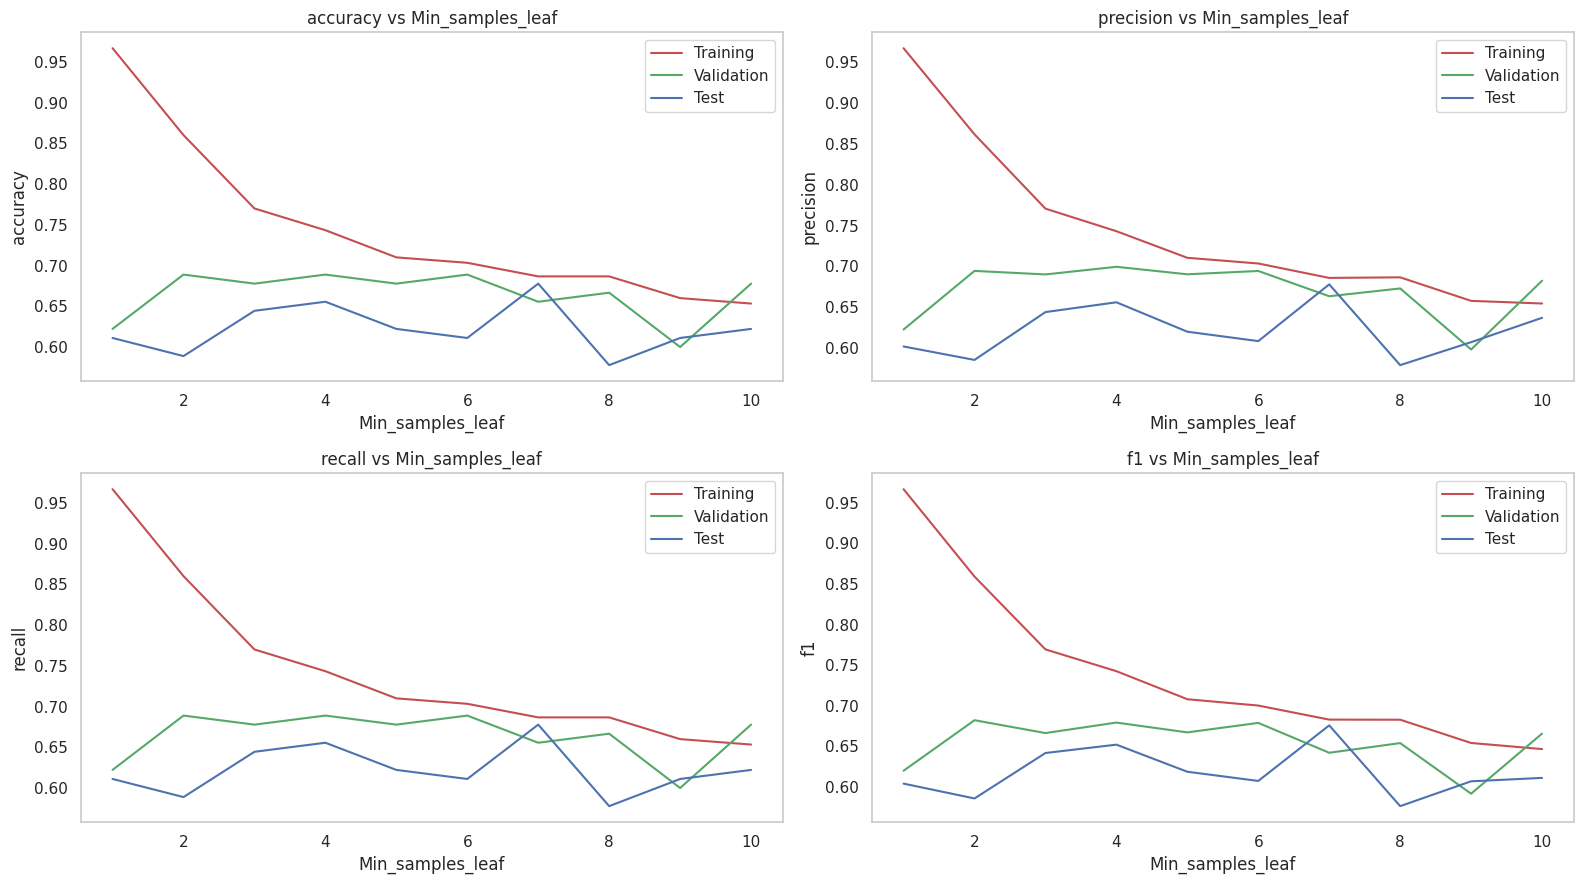

In [31]:
result_Min_samples_leaf = {'Min_samples_leaf': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for min_samples_leaf in Min_samples_leaf:
  model = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
  model.fit(train_data, train_label)

  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  result_Min_samples_leaf['Min_samples_leaf'].append(min_samples_leaf)
  result_Min_samples_leaf['train_accuracy'].append(accuracy_score(train_label, train_pred))
  result_Min_samples_leaf['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  result_Min_samples_leaf['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  result_Min_samples_leaf['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  result_Min_samples_leaf['val_accuracy'].append(accuracy_score(val_label, val_pred))
  result_Min_samples_leaf['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  result_Min_samples_leaf['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  result_Min_samples_leaf['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  result_Min_samples_leaf['test_accuracy'].append(accuracy_score(test_label, test_pred))
  result_Min_samples_leaf['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  result_Min_samples_leaf['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  result_Min_samples_leaf['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(result_Min_samples_leaf['Min_samples_leaf'], result_Min_samples_leaf[f'train_{metric}'], label='Training', color='r')
  plt.plot(result_Min_samples_leaf['Min_samples_leaf'], result_Min_samples_leaf[f'val_{metric}'], label='Validation', color='g')
  plt.plot(result_Min_samples_leaf['Min_samples_leaf'], result_Min_samples_leaf[f'test_{metric}'], label='Test', color='b')
  plt.xlabel('Min_samples_leaf')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Min_samples_leaf')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()


Random forest: similar to minimum number of samples for splitting, if the number of minimum number of samples for a leaf node is too high, the risk of underfitting will increase. Also, overfitting will occur if this hyperparameter is less than 2.

###Q5

Now we will compare the scores among ensembled models and individual best models.

In [32]:
# Voting classifier - Hard
from sklearn.ensemble import VotingClassifier

regression = LogisticRegression(C=100, max_iter=500, solver='newton-cg')
support_vector_machine = SVC(C=0.1, degree=2, gamma='scale', kernel='poly')
random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50)

voting_classifier = VotingClassifier(estimators=[('regression', regression), ('support_vector_machine', support_vector_machine), ('random_forest', random_forest)], voting='hard')
voting_classifier.fit(train_data, train_label)

train_pred = voting_classifier.predict(train_data)
val_pred = voting_classifier.predict(val_data)
test_pred = voting_classifier.predict(test_data)

Hard_vote_scores = {}

Hard_vote_scores['train_accuracy'] = accuracy_score(train_label, train_pred)
Hard_vote_scores['train_precision'] = precision_score(train_label, train_pred, average="weighted")
Hard_vote_scores['train_recall'] = recall_score(train_label, train_pred, average="weighted")
Hard_vote_scores['train_f1'] = f1_score(train_label, train_pred, average="weighted")
Hard_vote_scores['val_accuracy'] = accuracy_score(val_label, val_pred)
Hard_vote_scores['val_precision'] = precision_score(val_label, val_pred, average="weighted")
Hard_vote_scores['val_recall'] = recall_score(val_label, val_pred, average="weighted")
Hard_vote_scores['val_f1'] = f1_score(val_label, val_pred, average="weighted")
Hard_vote_scores['test_accuracy'] = accuracy_score(test_label, test_pred)
Hard_vote_scores['test_precision'] = precision_score(test_label, test_pred, average="weighted")
Hard_vote_scores['test_recall'] = recall_score(test_label, test_pred, average="weighted")
Hard_vote_scores['test_f1'] = f1_score(test_label, test_pred, average="weighted")

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [33]:
# Voting classifier - Soft
from sklearn.ensemble import VotingClassifier

regression = LogisticRegression(C=100, max_iter=500, solver='newton-cg')
support_vector_machine = SVC(C=0.1, degree=2, gamma='scale', kernel='poly', probability=True)
random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50)

voting_classifier = VotingClassifier(estimators=[('regression', regression), ('support_vector_machine', support_vector_machine), ('random_forest', random_forest)], voting='soft')
voting_classifier.fit(train_data, train_label)

train_pred = voting_classifier.predict(train_data)
val_pred = voting_classifier.predict(val_data)
test_pred = voting_classifier.predict(test_data)

Soft_vote_scores = {}

Soft_vote_scores['train_accuracy'] = accuracy_score(train_label, train_pred)
Soft_vote_scores['train_precision'] = precision_score(train_label, train_pred, average="weighted")
Soft_vote_scores['train_recall'] = recall_score(train_label, train_pred, average="weighted")
Soft_vote_scores['train_f1'] = f1_score(train_label, train_pred, average="weighted")
Soft_vote_scores['val_accuracy'] = accuracy_score(val_label, val_pred)
Soft_vote_scores['val_precision'] = precision_score(val_label, val_pred, average="weighted")
Soft_vote_scores['val_recall'] = recall_score(val_label, val_pred, average="weighted")
Soft_vote_scores['val_f1'] = f1_score(val_label, val_pred, average="weighted")
Soft_vote_scores['test_accuracy'] = accuracy_score(test_label, test_pred)
Soft_vote_scores['test_precision'] = precision_score(test_label, test_pred, average="weighted")
Soft_vote_scores['test_recall'] = recall_score(test_label, test_pred, average="weighted")
Soft_vote_scores['test_f1'] = f1_score(test_label, test_pred, average="weighted")

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [34]:
# Stacking
from sklearn.ensemble import StackingClassifier

regression = LogisticRegression(C=100, max_iter=500, solver='newton-cg')
support_vector_machine = SVC(C=0.1, degree=2, gamma='scale', kernel='poly', probability=True)
random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50)

stacking_classifier = StackingClassifier(estimators=[('regression', regression), ('support_vector_machine', support_vector_machine), ('random_forest', random_forest)], final_estimator=LogisticRegression())
stacking_classifier.fit(train_data, train_label)

train_pred = stacking_classifier.predict(train_data)
val_pred = stacking_classifier.predict(val_data)
test_pred = stacking_classifier.predict(test_data)

Stacking_scores = {}

Stacking_scores['train_accuracy'] = accuracy_score(train_label, train_pred)
Stacking_scores['train_precision'] = precision_score(train_label, train_pred, average="weighted")
Stacking_scores['train_recall'] = recall_score(train_label, train_pred, average="weighted")
Stacking_scores['train_f1'] = f1_score(train_label, train_pred, average="weighted")
Stacking_scores['val_accuracy'] = accuracy_score(val_label, val_pred)
Stacking_scores['val_precision'] = precision_score(val_label, val_pred, average="weighted")
Stacking_scores['val_recall'] = recall_score(val_label, val_pred, average="weighted")
Stacking_scores['val_f1'] = f1_score(val_label, val_pred, average="weighted")
Stacking_scores['test_accuracy'] = accuracy_score(test_label, test_pred)
Stacking_scores['test_precision'] = precision_score(test_label, test_pred, average="weighted")
Stacking_scores['test_recall'] = recall_score(test_label, test_pred, average="weighted")
Stacking_scores['test_f1'] = f1_score(test_label, test_pred, average="weighted")

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [35]:
regression = LogisticRegression(C=100, max_iter=500, solver='newton-cg')

regression.fit(train_data, train_label)

train_pred = regression.predict(train_data)
val_pred = regression.predict(val_data)
test_pred = regression.predict(test_data)

best_regression_scores = {}

best_regression_scores['train_accuracy'] = accuracy_score(train_label, train_pred)
best_regression_scores['train_precision'] = precision_score(train_label, train_pred, average="weighted")
best_regression_scores['train_recall'] = recall_score(train_label, train_pred, average="weighted")
best_regression_scores['train_f1'] = f1_score(train_label, train_pred, average="weighted")
best_regression_scores['val_accuracy'] = accuracy_score(val_label, val_pred)
best_regression_scores['val_precision'] = precision_score(val_label, val_pred, average="weighted")
best_regression_scores['val_recall'] = recall_score(val_label, val_pred, average="weighted")
best_regression_scores['val_f1'] = f1_score(val_label, val_pred, average="weighted")
best_regression_scores['test_accuracy'] = accuracy_score(test_label, test_pred)
best_regression_scores['test_precision'] = precision_score(test_label, test_pred, average="weighted")
best_regression_scores['test_recall'] = recall_score(test_label, test_pred, average="weighted")
best_regression_scores['test_f1'] = f1_score(test_label, test_pred, average="weighted")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
support_vector_machine = SVC(C=0.1, degree=2, gamma='scale', kernel='poly', probability=True)
support_vector_machine.fit(train_data, train_label)

train_pred = support_vector_machine.predict(train_data)
val_pred = support_vector_machine.predict(val_data)
test_pred = support_vector_machine.predict(test_data)

best_SVM_scores = {}

best_SVM_scores['train_accuracy'] = accuracy_score(train_label, train_pred)
best_SVM_scores['train_precision'] = precision_score(train_label, train_pred, average="weighted")
best_SVM_scores['train_recall'] = recall_score(train_label, train_pred, average="weighted")
best_SVM_scores['train_f1'] = f1_score(train_label, train_pred, average="weighted")
best_SVM_scores['val_accuracy'] = accuracy_score(val_label, val_pred)
best_SVM_scores['val_precision'] = precision_score(val_label, val_pred, average="weighted")
best_SVM_scores['val_recall'] = recall_score(val_label, val_pred, average="weighted")
best_SVM_scores['val_f1'] = f1_score(val_label, val_pred, average="weighted")
best_SVM_scores['test_accuracy'] = accuracy_score(test_label, test_pred)
best_SVM_scores['test_precision'] = precision_score(test_label, test_pred, average="weighted")
best_SVM_scores['test_recall'] = recall_score(test_label, test_pred, average="weighted")
best_SVM_scores['test_f1'] = f1_score(test_label, test_pred, average="weighted")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
random_forest.fit(train_data, train_label)

train_pred = random_forest.predict(train_data)
val_pred = random_forest.predict(val_data)
test_pred = random_forest.predict(test_data)

best_RF_scores = {}

best_RF_scores['train_accuracy'] = accuracy_score(train_label, train_pred)
best_RF_scores['train_precision'] = precision_score(train_label, train_pred, average="weighted")
best_RF_scores['train_recall'] = recall_score(train_label, train_pred, average="weighted")
best_RF_scores['train_f1'] = f1_score(train_label, train_pred, average="weighted")
best_RF_scores['val_accuracy'] = accuracy_score(val_label, val_pred)
best_RF_scores['val_precision'] = precision_score(val_label, val_pred, average="weighted")
best_RF_scores['val_recall'] = recall_score(val_label, val_pred, average="weighted")
best_RF_scores['val_f1'] = f1_score(val_label, val_pred, average="weighted")
best_RF_scores['test_accuracy'] = accuracy_score(test_label, test_pred)
best_RF_scores['test_precision'] = precision_score(test_label, test_pred, average="weighted")
best_RF_scores['test_recall'] = recall_score(test_label, test_pred, average="weighted")
best_RF_scores['test_f1'] = f1_score(test_label, test_pred, average="weighted")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


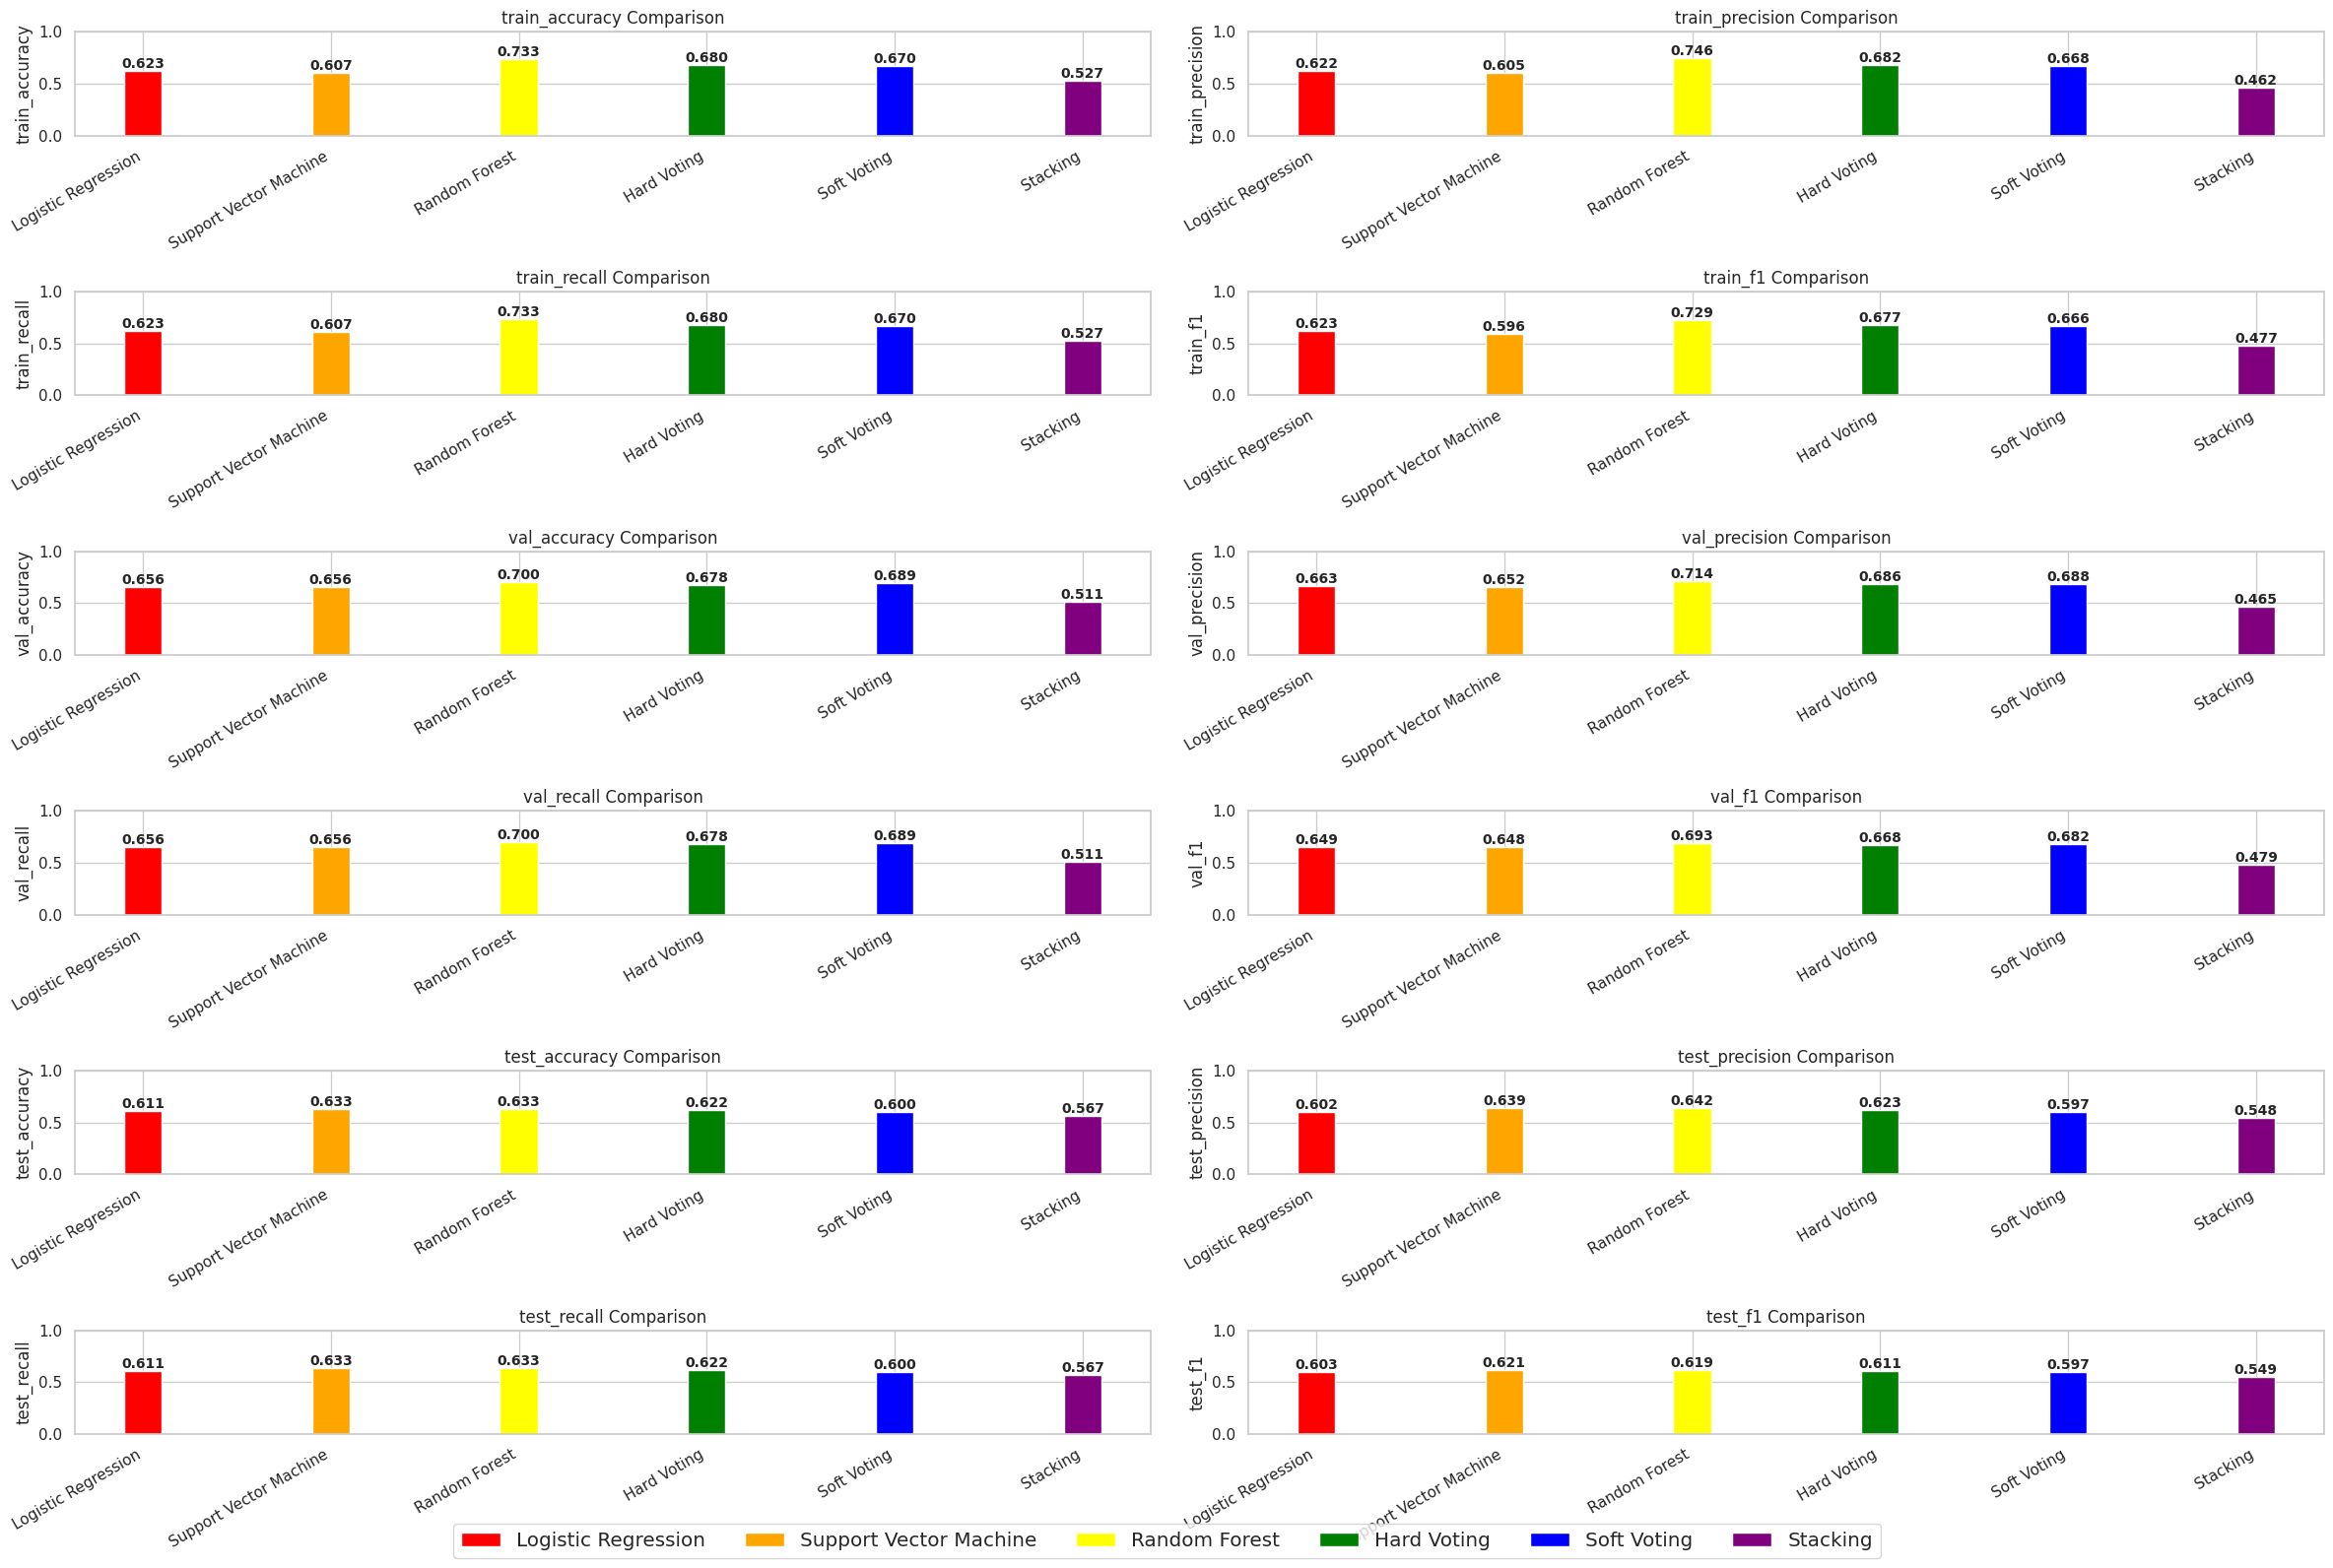

In [38]:
models_scores = {
    'Logistic Regression': best_regression_scores,
    'Support Vector Machine': best_SVM_scores,
    'Random Forest': best_RF_scores,
    'Hard Voting': Hard_vote_scores,
    'Soft Voting': Soft_vote_scores,
    'Stacking': Stacking_scores
}

metrics = ['train_accuracy', 'train_precision', 'train_recall', 'train_f1',
           'val_accuracy', 'val_precision', 'val_recall', 'val_f1',
           'test_accuracy', 'test_precision', 'test_recall', 'test_f1']

num_models = len(models_scores)
num_metrics = len(metrics)

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(24, 16))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
  ax = axes[idx]
  x = np.arange(num_models)
  width = 0.2

  bars = []
  for i, (model, color) in enumerate(zip(models_scores.keys(), colors)):
    scores = models_scores[model]
    bar = ax.bar(x[i], scores[metric], width, label=model, color=color)
    for rect in bar:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height, f"{height:.3f}",
                    ha="center", va="bottom", fontsize=10, fontweight="bold")

  ax.set_xticks(x)
  ax.set_xticklabels(models_scores.keys(), rotation=30, ha='right')
  ax.set_ylim(0, 1)
  ax.set_ylabel(metric)
  ax.set_title(f'{metric} Comparison')


fig.legend(models_scores.keys(), loc='lower center', ncol=6, fontsize='large')
plt.tight_layout()
plt.show()

For individual best models, Random forest outperforms the other two in training and validation, while SVM outperforms the other two in test.

For ensembled models, hard voting model outperforms the other two due to the highest validation scores, though soft voting model has the highest training scores.

###Q6

Extracting human data

In [39]:
human_data = pd.read_csv('trialData.csv')
human_data

subid  block  trial  rocknumber     category          subtype  \
0      A1HUMXQ7SEXD8E      1      1         331  Sedimentary  Bituminous Coal   
1      A1HUMXQ7SEXD8E      1      2         398  Sedimentary         Dolomite   
2      A1HUMXQ7SEXD8E      1      3          19      Igneous           Basalt   
3      A1HUMXQ7SEXD8E      1      4         338  Sedimentary          Breccia   
4      A1HUMXQ7SEXD8E      1      5          60      Igneous           Gabbro   
...               ...    ...    ...         ...          ...              ...   
88542  A2FXYZE13N65FJ      4   1076         366  Sedimentary            Chert   
88543  A2FXYZE13N65FJ      4   1077         412  Sedimentary          Micrite   
88544  A2FXYZE13N65FJ      4   1078         476  Sedimentary            Shale   
88545  A2FXYZE13N65FJ      4   1079         168  Metamorphic      Amphibolite   
88546  A2FXYZE13N65FJ      4   1080         517      Igneous           Pumice   

       token               type  catresponse recresponse  cat_correct  \
0         11  NonparentTraining  Metamorphic         NaN            0   
1         14  NonparentTraining      Igneous         NaN            0   
2          3  NonparentTraining  Sedimentary         NaN            0   
3          2  NonparentTraining  Metamorphic         NaN            0   
4         12  NonparentTraining  Sedimentary         NaN            0   
...      ...                ...          ...         ...          ...   
88542     14   StandardTransfer  Sedimentary          No            1   
88543     12   StandardTransfer  Sedimentary          No            1   
88544     12  NonparentTraining  Metamorphic         Yes            0   
88545      8  NonparentTraining  Sedimentary          No            0   
88546     17        HSNTransfer      Igneous          No            1   

       rec_correct  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
88542          1.0  
88543          1.0  
88544          1.0  
88545          0.0  
88546          1.0  

[88547 rows x 12 columns]

In [40]:
print(human_data.dtypes)

subid           object
block            int64
trial            int64
rocknumber       int64
category        object
subtype         object
token            int64
type            object
catresponse     object
recresponse     object
cat_correct      int64
rec_correct    float64
dtype: object


In [41]:
human_data_filtered = human_data[human_data['rocknumber'].isin(list(range(1, 481)))]
human_data_filtered

subid  block  trial  rocknumber     category          subtype  \
0      A1HUMXQ7SEXD8E      1      1         331  Sedimentary  Bituminous Coal   
1      A1HUMXQ7SEXD8E      1      2         398  Sedimentary         Dolomite   
2      A1HUMXQ7SEXD8E      1      3          19      Igneous           Basalt   
3      A1HUMXQ7SEXD8E      1      4         338  Sedimentary          Breccia   
4      A1HUMXQ7SEXD8E      1      5          60      Igneous           Gabbro   
...               ...    ...    ...         ...          ...              ...   
88541  A2FXYZE13N65FJ      4   1075         247  Metamorphic        Migmatite   
88542  A2FXYZE13N65FJ      4   1076         366  Sedimentary            Chert   
88543  A2FXYZE13N65FJ      4   1077         412  Sedimentary          Micrite   
88544  A2FXYZE13N65FJ      4   1078         476  Sedimentary            Shale   
88545  A2FXYZE13N65FJ      4   1079         168  Metamorphic      Amphibolite   

       token               type  catresponse recresponse  cat_correct  \
0         11  NonparentTraining  Metamorphic         NaN            0   
1         14  NonparentTraining      Igneous         NaN            0   
2          3  NonparentTraining  Sedimentary         NaN            0   
3          2  NonparentTraining  Metamorphic         NaN            0   
4         12  NonparentTraining  Sedimentary         NaN            0   
...      ...                ...          ...         ...          ...   
88541      7  NonparentTraining  Metamorphic         Yes            1   
88542     14   StandardTransfer  Sedimentary          No            1   
88543     12   StandardTransfer  Sedimentary          No            1   
88544     12  NonparentTraining  Metamorphic         Yes            0   
88545      8  NonparentTraining  Sedimentary          No            0   

       rec_correct  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
88541          1.0  
88542          1.0  
88543          1.0  
88544          1.0  
88545          0.0  

[83627 rows x 12 columns]

In [42]:
human_train = human_data_filtered[human_data_filtered['block'].isin([1, 2, 3])]
human_train

subid  block  trial  rocknumber     category          subtype  \
0      A1HUMXQ7SEXD8E      1      1         331  Sedimentary  Bituminous Coal   
1      A1HUMXQ7SEXD8E      1      2         398  Sedimentary         Dolomite   
2      A1HUMXQ7SEXD8E      1      3          19      Igneous           Basalt   
3      A1HUMXQ7SEXD8E      1      4         338  Sedimentary          Breccia   
4      A1HUMXQ7SEXD8E      1      5          60      Igneous           Gabbro   
...               ...    ...    ...         ...          ...              ...   
88002  A2FXYZE13N65FJ      3    536         278  Metamorphic        Quartzite   
88003  A2FXYZE13N65FJ      3    537          58      Igneous           Gabbro   
88004  A2FXYZE13N65FJ      3    538         304  Metamorphic           Schist   
88005  A2FXYZE13N65FJ      3    539         162  Metamorphic      Amphibolite   
88006  A2FXYZE13N65FJ      3    540         299  Metamorphic           Schist   

       token               type  catresponse recresponse  cat_correct  \
0         11  NonparentTraining  Metamorphic         NaN            0   
1         14  NonparentTraining      Igneous         NaN            0   
2          3  NonparentTraining  Sedimentary         NaN            0   
3          2  NonparentTraining  Metamorphic         NaN            0   
4         12  NonparentTraining  Sedimentary         NaN            0   
...      ...                ...          ...         ...          ...   
88002      6  NonparentTraining  Metamorphic         NaN            1   
88003     10  NonparentTraining      Igneous         NaN            1   
88004     16  NonparentTraining  Metamorphic         NaN            1   
88005      2  NonparentTraining      Igneous         NaN            0   
88006     11  NonparentTraining      Igneous         NaN            0   

       rec_correct  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
88002          NaN  
88003          NaN  
88004          NaN  
88005          NaN  
88006          NaN  

[44273 rows x 12 columns]

In [43]:
human_test = human_data_filtered[human_data_filtered['block'].isin([4])]
human_test

subid  block  trial  rocknumber     category          subtype  \
540    A1HUMXQ7SEXD8E      4    541         341  Sedimentary          Breccia   
541    A1HUMXQ7SEXD8E      4    542         413  Sedimentary          Micrite   
542    A1HUMXQ7SEXD8E      4    543         162  Metamorphic      Amphibolite   
543    A1HUMXQ7SEXD8E      4    544         217  Metamorphic         Hornfels   
544    A1HUMXQ7SEXD8E      4    545         326  Sedimentary  Bituminous Coal   
...               ...    ...    ...         ...          ...              ...   
88541  A2FXYZE13N65FJ      4   1075         247  Metamorphic        Migmatite   
88542  A2FXYZE13N65FJ      4   1076         366  Sedimentary            Chert   
88543  A2FXYZE13N65FJ      4   1077         412  Sedimentary          Micrite   
88544  A2FXYZE13N65FJ      4   1078         476  Sedimentary            Shale   
88545  A2FXYZE13N65FJ      4   1079         168  Metamorphic      Amphibolite   

       token               type  catresponse recresponse  cat_correct  \
540        5   StandardTransfer  Sedimentary         Yes            1   
541       13  NonparentTraining  Sedimentary         Yes            1   
542        2  NonparentTraining  Metamorphic         Yes            1   
543        9   StandardTransfer  Sedimentary         Yes            0   
544        6     ParentTraining  Sedimentary         Yes            1   
...      ...                ...          ...         ...          ...   
88541      7  NonparentTraining  Metamorphic         Yes            1   
88542     14   StandardTransfer  Sedimentary          No            1   
88543     12   StandardTransfer  Sedimentary          No            1   
88544     12  NonparentTraining  Metamorphic         Yes            0   
88545      8  NonparentTraining  Sedimentary          No            0   

       rec_correct  
540            0.0  
541            1.0  
542            1.0  
543            0.0  
544            1.0  
...            ...  
88541          1.0  
88542          1.0  
88543          1.0  
88544          1.0  
88545          0.0  

[39354 rows x 12 columns]

In [44]:
train_accuracy = human_train[human_train['cat_correct']==1].size / human_train.size
train_accuracy

0.5599349490660221

In [45]:
test_accuracy = human_test[human_test['cat_correct']==1].size / human_test.size
test_accuracy

0.5984143924378716

Human accuracy of both training and test are lower than those of the best machine learning model.

Computation of average human accuracy and standard deviation for each of the 480 rocks

In [46]:
accuracies = {}
color_dict = {}

for i in range(1, 481):
  numbered = human_data_filtered[human_data_filtered['rocknumber'] == i]
  accuracy = 0
  for b in range(1, 5):
    if numbered[numbered['block'] == b].size != 0:
      accuracy += numbered[numbered['block'] == b][numbered['cat_correct'] == 1].size / numbered[numbered['block'] == b].size
  average_accuracy = accuracy / 4
  accuracies[i] = average_accuracy
  if i < 160:
    color_dict[i] = 'r'
  elif i < 320:
    color_dict[i] = 'g'
  else:
    color_dict[i] = 'b'

accuracies

<ipython-input-46-d84fc04049a8>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  accuracy += numbered[numbered['block'] == b][numbered['cat_correct'] == 1].size / numbered[numbered['block'] == b].size
<ipython-input-46-d84fc04049a8>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  accuracy += numbered[numbered['block'] == b][numbered['cat_correct'] == 1].size / numbered[numbered['block'] == b].size
<ipython-input-46-d84fc04049a8>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  accuracy += numbered[numbered['block'] == b][numbered['cat_correct'] == 1].size / numbered[numbered['block'] == b].size
<ipython-input-46-d84fc04049a8>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  accuracy += numbered[numbered['block'] == b][numbered['cat_correct'] == 1].size / numbered[numbered['block'] == b].size
<ipython-input-46-d84fc04049a8>:9: UserWarning: Boolean Series key w

{1: 0.7469512195121952,
 2: 0.1798780487804878,
 3: 0.11280487804878049,
 4: 0.125,
 5: 0.12804878048780488,
 6: 0.21296296296296297,
 7: 0.1676829268292683,
 8: 0.10060975609756098,
 9: 0.6798780487804879,
 10: 0.1798780487804878,
 11: 0.4573170731707317,
 12: 0.8018292682926829,
 13: 0.1798780487804878,
 14: 0.7489837398373983,
 15: 0.17682926829268292,
 16: 0.7774390243902438,
 17: 0.027439024390243903,
 18: 0.018292682926829267,
 19: 0.6615853658536586,
 20: 0.036585365853658534,
 21: 0.027439024390243903,
 22: 0.13414634146341464,
 23: 0.23170731707317074,
 24: 0.03353658536585366,
 25: 0.021341463414634148,
 26: 0.17137157482685939,
 27: 0.7844181604466647,
 28: 0.8414634146341463,
 29: 0.051829268292682924,
 30: 0.16463414634146342,
 31: 0.6968533574224631,
 32: 0.11585365853658537,
 33: 0.771341463414634,
 34: 0.8569644431384073,
 35: 0.7978018669075579,
 36: 0.20121951219512196,
 37: 0.21341463414634146,
 38: 0.2073170731707317,
 39: 0.7922312556458897,
 40: 0.2408536585365853

In [47]:
assert len(accuracies) == 480

In [48]:
import statistics

standard_variances = []

for i in range(1, 481):
  numbered = human_data_filtered[human_data_filtered['rocknumber'] == i]
  accuracy_list = []
  for b in range(1, 5):
    if numbered[numbered['block'] == b].size != 0:
      accuracy_list.append(numbered[numbered['block'] == b][numbered['cat_correct'] == 1].size / numbered[numbered['block'] == b].size)
  standard_variances.append(float(np.std(accuracy_list)))


standard_variances


<ipython-input-48-5036667327a3>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  accuracy_list.append(numbered[numbered['block'] == b][numbered['cat_correct'] == 1].size / numbered[numbered['block'] == b].size)
<ipython-input-48-5036667327a3>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  accuracy_list.append(numbered[numbered['block'] == b][numbered['cat_correct'] == 1].size / numbered[numbered['block'] == b].size)
<ipython-input-48-5036667327a3>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  accuracy_list.append(numbered[numbered['block'] == b][numbered['cat_correct'] == 1].size / numbered[numbered['block'] == b].size)
<ipython-input-48-5036667327a3>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  accuracy_list.append(numbered[numbered['block'] == b][numbered['cat_correct'] == 1].size / numbered[numbered['block'] == b].size)
<ipython-input-48-503666

[0.03033498283861649,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08377214429289076,
 0.0,
 0.047623473633577176,
 0.07682684858752534,
 0.0,
 0.05635435216671452,
 0.0,
 0.11419707805078076,
 0.0,
 0.0,
 0.013289326047380114,
 0.0,
 0.0,
 0.02281498406569477,
 0.0,
 0.0,
 0.0,
 0.03185489540573457,
 0.05494516587944411,
 0.06218316479991202,
 0.0,
 0.0,
 0.08037410129656748,
 0.0,
 0.06531794294398949,
 0.0655470899982395,
 0.0719346922517355,
 0.0,
 0.0,
 0.0,
 0.062342895771513016,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07903342315131535,
 0.07467956532875544,
 0.0,
 0.0,
 0.0,
 0.0,
 0.06700384443852414,
 0.057902168892760085,
 0.0,
 0.0,
 0.0,
 0.03696449894201872,
 0.0,
 0.048301766822423355,
 0.04830176682242335,
 0.0,
 0.018036828607011026,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08152281681171301,
 0.0,
 0.0,
 0.07182450603286433,
 0.06531794294398946,
 0.0,
 0.021772647647996496,
 0.0,
 0.0,
 0.0901841430350551,
 0.0,
 0.0,
 0.0,
 0.06525321368643829,
 0.069187839743355,
 0.1102208992836

In [49]:
assert len(standard_variances) == 480

In [50]:
regression = LogisticRegression(C=100, max_iter=500, solver='newton-cg')
support_vector_machine = SVC(C=0.1, degree=2, gamma='scale', kernel='poly', probability=True)
random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50)

voting_classifier = VotingClassifier(estimators=[('regression', regression), ('support_vector_machine', support_vector_machine), ('random_forest', random_forest)], voting='soft')
voting_classifier.fit(train_data, train_label)

probs = voting_classifier.predict_proba(features)

#pred = voting_classifier.predict(features[i])

print(probs)
assert len(probs) == 480

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[[0.57870037 0.17444045 0.24685918]
 [0.80551643 0.06275521 0.13172836]
 [0.60737734 0.1880508  0.20457186]
 ...
 [0.15761312 0.37938026 0.46300662]
 [0.12390859 0.35304135 0.52305006]
 [0.19379761 0.41294822 0.39325417]]


Scatter plot of average human accuracy and model probability.

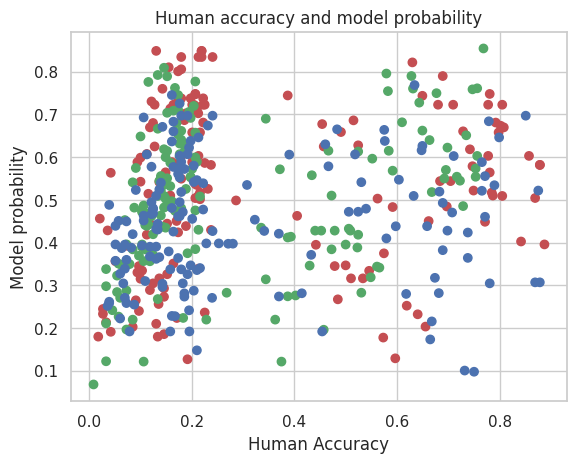

In [57]:

probs_class = []

for i in range(len(probs)):
  if i >= 0 and i < 160:
    probs_class.append(probs[i][0])
  elif i >= 160 and i < 320:
    probs_class.append(probs[i][1])
  else:
    probs_class.append(probs[i][2])

colors = ['r'] * 160 + ['g'] * 160 + ['b'] * 160

human_accuracies = list(accuracies.values())

plt.scatter(human_accuracies, probs_class, c=colors)
plt.xlabel('Human Accuracy')
plt.ylabel('Model probability')
plt.title('Human accuracy and model probability')
plt.show()

Compute the correlation coefficient between average human accuracies and model probabilities for each rock category (120 rocks per category) and for all rocks (all 480 rocks). Report the p-value.

In [54]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(list(accuracies.values()), probs_class)
print(f"Correlation coefficient of all rocks: {correlation}")
print(f"p-value of all rocks: {p_value}")

Correlation coefficient of all rocks: 0.16120765171246665
p-value of all rocks: 0.0003912854048243722


As the p-value is less than 0.05, the coefficient is significant for all rocks.

In [55]:
accuracies_list = list(accuracies.values())

acc_1, prob_1 = accuracies_list[:160], probs_class[:160]
print(f'Correlation coefficient of category 1: {pearsonr(acc_1, prob_1)[0]}')
print(f'p-value of category 1: {pearsonr(acc_1, prob_1)[1]}')

acc_2, prob_2 = accuracies_list[160:320], probs_class[160:320]
print(f'Correlation coefficient of category 2: {pearsonr(acc_2, prob_2)[0]}')
print(f'p-value of category 2: {pearsonr(acc_2, prob_2)[1]}')

acc_3, prob_3 = accuracies_list[320:], probs_class[320:]
print(f'Correlation coefficient of category 3: {pearsonr(acc_3, prob_3)[0]}')
print(f'p-value of category 3: {pearsonr(acc_3, prob_3)[1]}')

Correlation coefficient of category 1: 0.10556574605433372
p-value of category 1: 0.18399370125608794
Correlation coefficient of category 2: 0.29692544345038696
p-value of category 2: 0.00013743109702218128
Correlation coefficient of category 3: 0.09841882728008475
p-value of category 3: 0.21565748939504154


Here, for an individual category, high significance of coefficient is in category 2, with categories 1 and 3 having less significant coefficient.